# Various plots for the thesis

In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc
plt.rc('legend',fontsize=20) 
from bokeh.models.formatters import NumeralTickFormatter
from tqdm.notebook import tqdm
import glob
from pyfaidx import Fasta
from pathlib import Path
import os
from venny4py.venny4py import *

### TE sf
* L1-Tx1
* I-Jockey
* Penelope
* LTR
* 5S-Deu-L2
* tRNA-Deu
* Crypton
* PiggyBac
* Kolobok
* MULE-MuDR
* DNA
* Helitron
* Merlin

### Functions

In [2]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1.5 else ''

### ASR plots

In [3]:
asr_data = {
    'te_name':[],
    'base_asr':[],
    'ori_seqs':[],
    'ori_seqs_total':[],
    'test_seqs':[],
    'test_seqs_total':[],
    'base_iden':[],
}
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/base/asr_hmm_results/*asr.out', recursive=True), desc='asr'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    #print(f_path)
    #print(te_name)
    asr_data['te_name'].append(te_name)
    df_base = pd.read_table(f, 
                            sep=' ', 
                            skipinitialspace=True, 
                            comment='#', 
                            header=None, 
                            usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                            names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
    df_base.drop_duplicates(subset='target_name', inplace=True)
    df_base_valid = df_base[df_base['evalue']<0.01].copy()
    base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
    asr_data['base_asr'].append(len(base_pos_strand))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/base/asr_hmm_results/*_or_fasta.out', recursive=True), desc='asr or'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    #print(f_path)
    #print(te_name)
    #asr_data['te_name'].append(te_name)
    df_base = pd.read_table(f, 
                            sep=' ', 
                            skipinitialspace=True, 
                            comment='#', 
                            header=None, 
                            usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                            names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
    df_base.drop_duplicates(subset='target_name', inplace=True)
    df_base_valid = df_base[df_base['evalue']<0.01].copy()
    base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
    asr_data['ori_seqs'].append(len(base_pos_strand))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/base/asr_hmm_results/*_test_fasta.out', recursive=True), desc='asr test'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    #print(f_path)
    #print(te_name)
    #asr_data['te_name'].append(te_name)
    df_base = pd.read_table(f, 
                            sep=' ', 
                            skipinitialspace=True, 
                            comment='#', 
                            header=None, 
                            usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                            names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
    df_base.drop_duplicates(subset='target_name', inplace=True)
    df_base_valid = df_base[df_base['evalue']<0.01].copy()
    base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
    asr_data['test_seqs'].append(len(base_pos_strand))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/top_seqs_identity*.csv', recursive=True), desc='Sel CSV identity'):
    f_path = Path(f)
    sel_gap_data = pd.read_csv(f, index_col=0)
    asr_data['base_iden'].append(np.mean(sel_gap_data['identity_perc_median']))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/caljac_*.fasta', recursive=True), desc='asr'):
    f_path = Path(f)
    #print(f_path)
    te_file = Fasta(f)
    asr_data['ori_seqs_total'].append(len(te_file.keys()))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/[0-9]*.fasta', recursive=True), desc='asr'):
    f_path = Path(f)
    test_file_total = int(str(f_path.stem).split('_')[0])
    asr_data['test_seqs_total'].append(test_file_total)
te_asr_df = pd.DataFrame.from_dict(asr_data)

asr:   0%|          | 0/13 [00:00<?, ?it/s]

asr or:   0%|          | 0/13 [00:00<?, ?it/s]

asr test:   0%|          | 0/13 [00:00<?, ?it/s]

Sel CSV identity:   0%|          | 0/13 [00:00<?, ?it/s]

asr:   0%|          | 0/13 [00:00<?, ?it/s]

asr:   0%|          | 0/13 [00:00<?, ?it/s]

In [4]:
te_asr_df

te_name  base_asr  ori_seqs  ori_seqs_total  test_seqs  test_seqs_total  \
0   5s_deu_l2       143         9           12553          0            12408   
1     crypton       263        59            1685         28             1420   
2         dna       103         6           15000          2            14895   
3    helitron        88        30            9380         10             9280   
4     ijockey         8        86            1120         77             1110   
5     kolobok       128         2            1199          0             1069   
6      l1-tx1        48        31             908          0              858   
7         ltr        98         1           15000          0            14900   
8      merlin       283        78            1205         22              920   
9   mule_mudr         8      3002           11219       2993            11209   
10   penelope         3        76            5055         71             5050   
11   piggybac        63      1485            9856       1423             9791   
12   trna_deu       258        25            3288         16             3028   

    base_iden  
0   49.627922  
1   51.040881  
2   51.289397  
3   50.348035  
4   58.446480  
5   52.625260  
6   48.736735  
7   49.311453  
8   52.883646  
9   60.715125  
10  88.586617  
11  82.215736  
12  50.739932

In [43]:
te_asr_df.rename(columns={'te_name':'TE Name', 
'base_asr':'Base ASR', 
'ori_seqs':'Original seqs.', 
'ori_seqs_total':'Total Ori. Seqs.', 
'test_seqs':'Test dataset seqs.',
'test_seqs_total':'Total test dataset seq.',
'base_iden':'Base Identity'}, inplace=True)

In [54]:
asr_plot = te_asr_df.hvplot.bar(x='TE Name',y=['Original seqs.', 'Total Ori. Seqs.', 'Test dataset seqs.','Total test dataset seq.'],grid=True, rot=90, width=1600, height=1000,fontsize= {'ylabel': 20, 'xlabel': 20, 'ticks': 15,'legend':20})

In [55]:
asr_plot

:Bars   [TE Name,Variable]   (value)

In [56]:
hvplot.save(asr_plot, filename='/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/paper/asr_plot_selected_dataset.html')

### PID and GAP plots

#### phylo constraints

#### normal and selected

In [2]:
full_seq_id_gap_data = {
    'te_name':[],
    'median_identity_perc':[],
    'gap_median_median':[],
    'phmm_hits':[],
    'sel_median_identity_perc':[],
    'sel_gap_median_median':[],
    'sel_phmm_hits':[],
    'median_idper_branch':[],
    'median_gap_branch':[],
    'median_idper_boot':[],
    'median_gap_boot':[],
    'branch_phmm_hits':[],
    'boot_phmm_hits':[],
    
}
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/*/*_identity_percentage.csv', recursive=True), desc='phylo const indentity'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    al_type = str(f_path.parent).split('/')[7]        
    if 'branch' in al_type:
        pid_data = pd.read_csv(f, index_col=0)
        full_seq_id_gap_data['median_idper_branch'].append(np.median(pid_data['identity_perc_median']))
    if 'bootstrap' in al_type:
        pid_data = pd.read_csv(f, index_col=0)
        full_seq_id_gap_data['median_idper_boot'].append(np.median(pid_data['identity_perc_median']))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/*/*_gap_percentage.csv', recursive=True), desc='phylo const gap'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    al_type = str(f_path.parent).split('/')[7]        
    if 'branch' in al_type:
        gap_data = pd.read_csv(f, index_col=0)
        full_seq_id_gap_data['median_gap_branch'].append(np.median(gap_data['seq_gaps_median']))        
    if 'bootstrap' in al_type:
        gap_data = pd.read_csv(f, index_col=0)
        full_seq_id_gap_data['median_gap_boot'].append(np.median(gap_data['seq_gaps_median']))   
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/*/hmm_res/*.out', recursive=True), desc='hmm phylo const'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    al_type = str(f_path.parent).split('/')[7]
    if 'branch' in al_type:
        df_base = pd.read_table(f, 
                                sep=' ', 
                                skipinitialspace=True, 
                                comment='#', 
                                header=None, 
                                usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                                names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
        #print(len(df_base))
        df_base.drop_duplicates(subset='target_name', inplace=True)
        df_base_valid = df_base[df_base['evalue']<0.01].copy()
        base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
        full_seq_id_gap_data['branch_phmm_hits'].append(len(base_pos_strand))
    if 'bootstrap' in al_type:
        df_base = pd.read_table(f, 
                                sep=' ', 
                                skipinitialspace=True, 
                                comment='#', 
                                header=None, 
                                usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                                names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
        #print(len(df_base))
        df_base.drop_duplicates(subset='target_name', inplace=True)
        df_base_valid = df_base[df_base['evalue']<0.01].copy()
        base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
        full_seq_id_gap_data['boot_phmm_hits'].append(len(base_pos_strand))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/gap_*.csv', recursive=True), desc='CSV gap'):
    f_path = Path(f)
    full_seq_id_gap_data['te_name'].append(str(f_path.parent).split('/')[-1:][0])
    gap_data = pd.read_csv(f, index_col=0)
    full_seq_id_gap_data['gap_median_median'].append(np.median(gap_data['seq_gaps_median']))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/identity_*.csv', recursive=True), desc='CSV iden'):
    f_path = Path(f)
    #print(str(f_path.parent).split('/')[-1:][0])
    pid_data = pd.read_csv(f, index_col=0)
    full_seq_id_gap_data['median_identity_perc'].append(np.median(pid_data['identity_perc_median']))

for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/top_seqs_gap*.csv', recursive=True), desc='Sel CSV gap'):
    f_path = Path(f)
    sel_gap_data = pd.read_csv(f, index_col=0)
    full_seq_id_gap_data['sel_gap_median_median'].append(np.median(sel_gap_data['seq_gaps_median']))

for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/top_seqs_identity*.csv', recursive=True), desc='Sel CSV identity'):
    f_path = Path(f)
    sel_gap_data = pd.read_csv(f, index_col=0)
    full_seq_id_gap_data['sel_median_identity_perc'].append(np.median(sel_gap_data['identity_perc_median']))

for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/alignment_localpair/hmm_res/*.out', recursive=True), desc='hmm'):
    f_path = Path(f)
    #print(f_path)
    df_base = pd.read_table(f, 
                            sep=' ', 
                            skipinitialspace=True, 
                            comment='#', 
                            header=None, 
                            usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                            names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
    #print(len(df_base))
    df_base.drop_duplicates(subset='target_name', inplace=True)
    df_base_valid = df_base[df_base['evalue']<0.01].copy()
    base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
    full_seq_id_gap_data['phmm_hits'].append(len(base_pos_strand))
    #print(len(base_pos_strand))
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/*/base/hmm_results/*.out', recursive=True), desc='sel hmm'):
    f_path = Path(f)
    te_name = str(f_path.parent).split('/')[5]
    #print(te_name)
    df_base = pd.read_table(f, 
                            sep=' ', 
                            skipinitialspace=True, 
                            comment='#', 
                            header=None, 
                            usecols=[0,4,5,6,7,8,9,10,11,12,13,14], 
                            names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
    #print(len(df_base))
    df_base.drop_duplicates(subset='target_name', inplace=True)
    df_base_valid = df_base[df_base['evalue']<0.01].copy()
    base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
    full_seq_id_gap_data['sel_phmm_hits'].append(len(base_pos_strand))
    #print(len(base_pos_strand))
te_align_df = pd.DataFrame.from_dict(full_seq_id_gap_data)

phylo const indentity:   0%|          | 0/26 [00:00<?, ?it/s]

phylo const gap:   0%|          | 0/26 [00:00<?, ?it/s]

hmm phylo const:   0%|          | 0/26 [00:00<?, ?it/s]

CSV gap:   0%|          | 0/13 [00:00<?, ?it/s]

CSV iden:   0%|          | 0/13 [00:00<?, ?it/s]

Sel CSV gap:   0%|          | 0/13 [00:00<?, ?it/s]

Sel CSV identity:   0%|          | 0/13 [00:00<?, ?it/s]

hmm:   0%|          | 0/13 [00:00<?, ?it/s]

sel hmm:   0%|          | 0/13 [00:00<?, ?it/s]

In [3]:
sim_df_temp = pd.DataFrame()
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/pHMM_sim_test/*/*/*/*localpair_.csv', recursive=True), desc='sim CSV localpair'):
    f_path = Path(f)
    #print(f_path)
    mutation = f.split('/')[-1:][0].split('_')[0]
    n_seq = f.split('/')[6].split('_')[2]
    #print(n_seq)
    sim_data = pd.read_csv(f, index_col=[0], )
    s_plot = sim_data[sim_data['level_0']==1][['median_identity_perc','phmm_hits','seq_len']]
    s_plot = s_plot.assign(mutation_type = [mutation for _ in range(len(s_plot))])
    s_plot = s_plot.assign(n_seq = [int(n_seq) for _ in range(len(s_plot))])
    sim_df_temp = pd.concat([sim_df_temp, s_plot])
    #sim_plot = sim_data[sim_data['level_0']==1][['median_identity_perc','phmm_hits']]
    #print(sim_plot)

sim CSV localpair:   0%|          | 0/130 [00:00<?, ?it/s]

In [4]:
te_align_df

te_name  median_identity_perc  gap_median_median  phmm_hits  \
0   5s_deu_l2             54.545455          28.865979         16   
1     crypton             52.467132          30.927835        205   
2         dna             52.845528          30.909091         21   
3    helitron             51.630435          32.096651         69   
4     ijockey             55.555556          27.710843         37   
5     kolobok             52.071006          31.428571        610   
6      l1-tx1             50.208366          33.689885        138   
7         ltr             51.136364          32.740729          3   
8      merlin             55.303030          28.030303        276   
9   mule_mudr             52.694611          31.052632       2621   
10   penelope             56.250000          27.118644         41   
11   piggybac             52.586207          30.927835        951   
12   trna_deu             54.545455          29.032258         71   

    sel_median_identity_perc  sel_gap_median_median  sel_phmm_hits  \
0                  49.677419              34.042553            424   
1                  50.961538              32.653061            406   
2                  51.346801              31.988473            332   
3                  50.249478              33.027676            638   
4                  59.734901              20.240872            112   
5                  52.708631              30.085181            457   
6                  49.058850              35.432115            182   
7                  49.218448              34.476871            220   
8                  52.857143              31.474104            348   
9                  67.916027              16.198609           3179   
10                 98.821218               0.000000             64   
11                 83.558994               2.509653           1620   
12                 50.731847              33.155034            405   

    median_idper_branch  median_gap_branch  median_idper_boot  \
0             59.490506          22.310732          49.655214   
1             58.980885          22.617825          50.961538   
2             54.185022          28.781204          51.368543   
3             53.295731          28.760769          50.201655   
4             59.734901          19.791313          60.126582   
5             57.358360          23.028747          52.708631   
6             50.319686          32.343593          49.058850   
7             51.417386          31.388976          49.067424   
8             66.896752          13.979945          52.924791   
9             67.916027          16.198609          67.916027   
10            99.115914           0.000000          99.115914   
11            83.665521           2.461217          84.141542   
12            54.165644          27.703488          50.754430   

    median_gap_boot  branch_phmm_hits  boot_phmm_hits  
0         33.979563               942             373  
1         32.653061               124             246  
2         31.888826               398             313  
3         33.078834               937             688  
4         19.345238               108             104  
5         30.085181               393             473  
6         35.432115               152             140  
7         35.013783              1150             286  
8         31.439394                78             107  
9         16.198609              3239            3239  
10         0.000000                74              74  
11         2.333497              1555            1551  
12        33.158949               362             198

# plots

In [5]:
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, save, reset_output, output_notebook, output_file
import panel as pn
from bokeh.palettes import Category20
from bokeh.core.enums import MarkerType

In [6]:
output_notebook()

Loading BokehJS ...

In [15]:
#sim_df_temp.hvplot.explorer()

In [48]:
sel_markers = ['plus','circle','cross','diamond','hex','inverted_triangle','square','star','triangle','star_dot','triangle_pin','circle_y','square_pin']
te_align_df = te_align_df.assign(marker=sel_markers)

In [62]:
# color
te_align_df = te_align_df.assign(color=list(Category20[len(te_align_df)]))

In [11]:
main_hover = HoverTool(tooltips=[("TE Superfamily","@te_name"),
                                 ("Median Identity %","@median_identity_perc"),
                                 ('pHMM hits','@phmm_hits'), 
                                 ('Median Gaps %','@gap_median_median')],)
# change sel_gap
sel_hover = HoverTool(tooltips=[("TE Superfamily","@te_name"),
                                ("Median Identity %","@sel_median_identity_perc"),
                                ('Sel. Seqs. pHMM hits','@sel_phmm_hits'), 
                                ('Sel. Median Gaps %','@sel_gap_median_median')],)
branch_hover = HoverTool(tooltips=[("TE Superfamily","@te_name"),
                                   ("Median Identity %","@median_idper_branch"),
                                   ('Branch sel. Seqs. pHMM hits','@branch_phmm_hits'), 
                                   ('Branch sel. Median Gaps %','@median_gap_branch')],)
boot_hover = HoverTool(tooltips=[("TE Superfamily","@te_name"),
                                 ("Median Identity %","@median_idper_boot"),
                                 ('Bootstrap sel. Seqs. pHMM hits','@boot_phmm_hits'), 
                                 ('Bootstrap sel. Median Gaps %','@median_gap_boot')],)

In [68]:
p_width= 1400 
p_height= 900

In [80]:
p_title = 'pHMM Hits vs Identity percentage.\n13 TE superfamilies'
legend = te_align_df.hvplot.scatter(x='median_identity_perc', y='phmm_hits', by='te_name', marker='marker', color='red', alpha=1, size=1)
main_plot = te_align_df.hvplot.scatter(x='median_identity_perc', y='phmm_hits', title=p_title, width=p_width, height=p_height, xlim=(0,100), xlabel='Median - Identity %', ylabel='pHMM Hits', line_color="black", color='red', marker='marker', alpha=0.8, size=400, grid=True, tools=[main_hover],hover_cols=["te_name","gap_median_median"], fontsize= {'ylabel': 20, 'xlabel': 20, 'ticks': 20,'legend':20}, label='Full dataset')

main_sel_plot = te_align_df.hvplot.scatter(x='sel_median_identity_perc', y='sel_phmm_hits',  title=p_title, xlim=(0,100), xlabel='Median - Identity %', ylabel='pHMM Hits', line_color="black", alpha=0.6, size=400, grid=True, color='blue',marker='marker', tools=[sel_hover],hover_cols=["te_name","sel_gap_median_median"], label='Selected dataset')

branch_sel_plot = te_align_df.hvplot.scatter(x='median_idper_branch', y='branch_phmm_hits',  title=p_title, xlim=(0,100), xlabel='Median - Identity %', ylabel='pHMM Hits',  line_color="black", alpha=0.6, size=400, grid=True, color='yellow',marker='marker', tools=[branch_hover],hover_cols=["te_name","median_gap_branch"], label='Branch cstr. dataset')
boot_sel_plot = te_align_df.hvplot.scatter(x='median_idper_boot', y='boot_phmm_hits',  title=p_title, xlim=(0,100), xlabel='Median - Identity %', ylabel='pHMM Hits',  line_color="black", alpha=0.6, size=400, grid=True, color='green',marker='marker', tools=[boot_hover],hover_cols=["te_name","median_gap_boot"], label='Bootstrap cstr. dataset')

sim_plot = sim_df_temp.hvplot.line(x='median_identity_perc', y='phmm_hits', by='mutation_type', groupby=['n_seq','seq_len'], xlim=(0,100), xlabel='Median - Identity %', ylabel='pHMM Hits', line_width=5)

In [81]:
plot = main_plot * main_sel_plot * sim_plot * branch_sel_plot * boot_sel_plot * legend

In [82]:
plot

:DynamicMap   [n_seq,seq_len]
   :Overlay
      .Scatter.Full_dataset                     :Scatter   [median_identity_perc]   (phmm_hits,marker,te_name,gap_median_median)
      .Scatter.Selected_dataset                 :Scatter   [sel_median_identity_perc]   (sel_phmm_hits,marker,te_name,sel_gap_median_median)
      .NdOverlay.I                              :NdOverlay   [mutation_type]
         :Curve   [median_identity_perc]   (phmm_hits)
      .Scatter.Branch_cstr_full_stop_dataset    :Scatter   [median_idper_branch]   (branch_phmm_hits,marker,te_name,median_gap_branch)
      .Scatter.Bootstrap_cstr_full_stop_dataset :Scatter   [median_idper_boot]   (boot_phmm_hits,marker,te_name,median_gap_boot)
      .NdOverlay.II                             :NdOverlay   [te_name]
         :Scatter   [median_identity_perc]   (phmm_hits,marker)

In [83]:
hvplot.save(plot, filename='/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/paper/sim_plot_dynamic.html')

## PHMM intersections

In [3]:
phmm_res_1 = '/mnt/d/GoogleDrive/tree_processing/crypton/alignment_localpair/hmm_res/caljac_mmul_gorgor_panpan_hg38_Crypton_clean_seqs.out'
phmm_res_2 = '/mnt/d/GoogleDrive/tree_processing/crypton/full_alignment/base/asr_hmm_res/1685_asr.out'
phmm_res_3 = '/mnt/d/GoogleDrive/tree_processing/crypton/265_data/base/hmm_results/test_files_nhmmer/265_vs_1420_test_sequences.out'
phmm_res_4 = '/mnt/d/GoogleDrive/tree_processing/crypton/265_data/base/hmm_results/260_265_train_sequences_pw_al_score_addfragments_profile.out'
phmm_res_5 = '/mnt/d/GoogleDrive/tree_processing/crypton/265_data/base/asr_hmm_results/msa_260_265_asr_test_fasta.out'
phmm_res_6 = '/mnt/d/GoogleDrive/tree_processing/crypton/265_data/base/asr_hmm_results/msa_260_265_asr_or_fasta.out'

In [4]:
df_base = pd.read_table(phmm_res_1, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
df_base_asr = pd.read_table(phmm_res_2, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
df_sel = pd.read_table(phmm_res_3, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
df_sel_full = pd.read_table(phmm_res_4, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
df_sel_asr = pd.read_table(phmm_res_5, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])
df_sel_asr_full = pd.read_table(phmm_res_6, sep=' ', skipinitialspace=True, comment='#', header=None, usecols=[0,4,5,6,7,8,9,10,11,12,13,14],names=['target_name','hmmfrom','hmmto','alifrom','alito','envfrom','envto','sqlen','strand','evalue','score','bias'])

In [5]:
df_base.drop_duplicates(subset='target_name', inplace=True)
df_base_asr.drop_duplicates(subset='target_name', inplace=True)
df_sel.drop_duplicates(subset='target_name', inplace=True)
df_sel_full.drop_duplicates(subset='target_name', inplace=True)
df_sel_asr.drop_duplicates(subset='target_name', inplace=True)
df_sel_asr_full.drop_duplicates(subset='target_name', inplace=True)

In [6]:
df_base_valid = df_base[df_base['evalue']<0.01].copy()
df_sel_valid = df_sel[df_sel['evalue']<0.01].copy()
df_base_asr_valid = df_base_asr[df_base_asr['evalue']<0.01].copy()
df_sel_full_valid = df_sel_full[df_sel_full['evalue']<0.01].copy()
df_sel_asr_valid = df_sel_asr[df_sel_asr['evalue']<0.01].copy()
df_sel_asr_full_valid = df_sel_asr_full[df_sel_asr_full['evalue']<0.01].copy()

In [7]:
base_pos_strand = df_base_valid[df_base_valid['strand']=='+'].copy()
sel_pos_strand = df_sel_valid[df_sel_valid['strand']=='+'].copy()
base_asr_pos_strand = df_base_asr_valid[df_base_asr_valid['strand']=='+'].copy()
sel_full_pos_strand = df_sel_full_valid[df_sel_full_valid['strand']=='+'].copy()
sel_asr_pos_strand = df_sel_asr_valid[df_sel_asr_valid['strand']=='+'].copy()
sel_asr_full_pos_strand = df_sel_asr_full_valid[df_sel_asr_full_valid['strand']=='+'].copy()

In [8]:
base_pos_list = base_pos_strand['target_name'].to_list()
sel_pos_list = sel_pos_strand['target_name'].to_list()
base_asr_pos_list = base_asr_pos_strand['target_name'].to_list()
sel_full_pos_list = sel_full_pos_strand['target_name'].to_list()
sel_asr_pos_list = sel_asr_pos_strand['target_name'].to_list()
sel_asr_full_pos_list = sel_asr_full_pos_strand['target_name'].to_list()

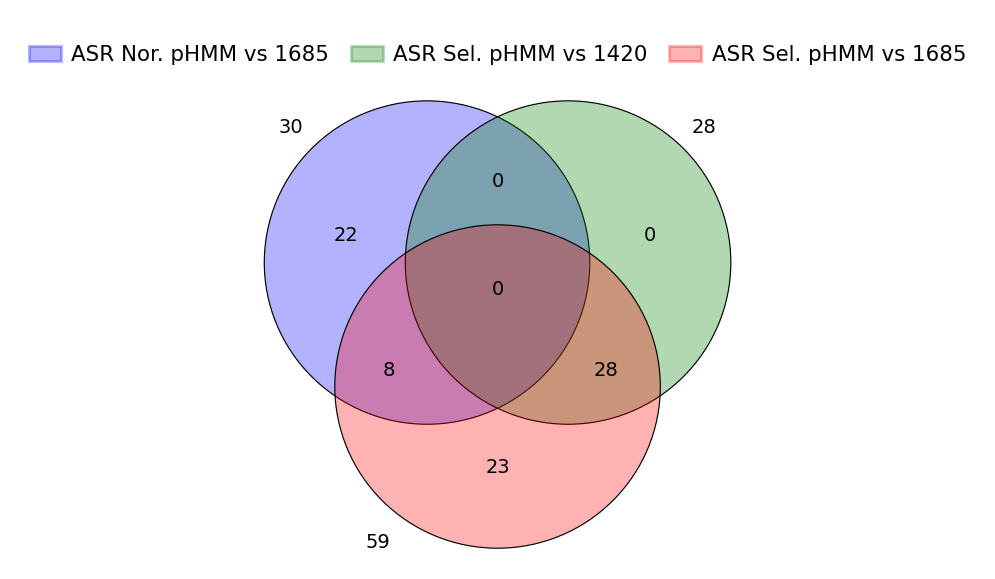

In [15]:
#dict of sets
sets = {
    #'Nor. pHMM vs 1685': set(base_pos_list),
    #'Sel. pHMM vs 1420': set(sel_pos_list),
    #'Sel. pHMM vs 1685': set(sel_full_pos_list),        
    'ASR Nor. pHMM vs 1685': set(base_asr_pos_list),
    'ASR Sel. pHMM vs 1420': set(sel_asr_pos_list),
    'ASR Sel. pHMM vs 1685': set(sel_asr_full_pos_list),
}
    
venny4py(sets=sets)

## length distributions

In [3]:
for f in tqdm(glob.glob('/mnt/d/GoogleDrive/tree_processing/*/caljac_*.fasta', recursive=True), desc='TEs'):
    te_name = Path(f).name.split('_')[-2:][0].split('.')[0]
    te_file = Fasta(f)
    total_tes = len(te_file.keys())
    work_folder = str(Path(f).parent)
    lenght_dist = {
        'length':[]
    }
    print('total tes: ', total_tes)
    print('te name: ', te_name)
    print('work foilder: ', work_folder)
    for seq in te_file:
        #print(len(seq))
        lenght_dist['length'].append(len(seq))
    len_df = pd.DataFrame.from_dict(lenght_dist)
    len_dist_plot = len_df['length'].hvplot.hist(width=700,height=400,xlabel='Seq. length', ylabel='Quantity', title='Length Distribution of TE '+str(te_name)+'. \nTotal sequences: '+str(total_tes))
    hvplot.save(len_dist_plot, os.path.join(work_folder, 'len_dist_'+str(te_name)+'.html'))

TEs:   0%|          | 0/12 [00:00<?, ?it/s]

total tes:  12553
te name:  5S-Deu-L2
work foilder:  /mnt/d/GoogleDrive/tree_processing/5s_deu_l2
total tes:  1685
te name:  Crypton
work foilder:  /mnt/d/GoogleDrive/tree_processing/crypton
total tes:  15000
te name:  DNA
work foilder:  /mnt/d/GoogleDrive/tree_processing/dna
total tes:  9380
te name:  Helitron
work foilder:  /mnt/d/GoogleDrive/tree_processing/helitron
total tes:  1120
te name:  I-Jockey
work foilder:  /mnt/d/GoogleDrive/tree_processing/ijockey
total tes:  1199
te name:  Kolobok
work foilder:  /mnt/d/GoogleDrive/tree_processing/kolobok
total tes:  908
te name:  L1-Tx1
work foilder:  /mnt/d/GoogleDrive/tree_processing/l1-tx1
total tes:  15000
te name:  LTR
work foilder:  /mnt/d/GoogleDrive/tree_processing/ltr
total tes:  11219
te name:  MULE-MuDR
work foilder:  /mnt/d/GoogleDrive/tree_processing/mule_mudr
total tes:  5055
te name:  Penelope
work foilder:  /mnt/d/GoogleDrive/tree_processing/penelope
total tes:  9856
te name:  PiggyBac
work foilder:  /mnt/d/GoogleDrive/tr

# TE content

In [6]:
# note
hg38_data = pd.read_csv('/mnt/d/GoogleDrive/hg38_filtered_tes.csv',)
panpan_data = pd.read_csv('/mnt/d/GoogleDrive/panpan_filtered_tes.csv',)
gorgor_data = pd.read_csv('/mnt/d/GoogleDrive//gorgor_filtered_tes.csv')
mmul_data = pd.read_csv('/mnt/d/GoogleDrive/mmul_filtered_tes.csv',)
caljac_data = pd.read_csv('/mnt/d/GoogleDrive/caljac_filtered_tes.csv',)

In [4]:
# pc
hg38_data = pd.read_csv('/mnt/d/genomes/human_repeatmasker/hg38_filtered_tes.csv',)
panpan_data = pd.read_csv('/mnt/d/genomes/panpan_repeatmasker/panpan_filtered_tes.csv',)
gorgor_data = pd.read_csv('/mnt/d/genomes/gorgor_repeatmasker/gorgor_filtered_tes.csv')
mmul_data = pd.read_csv('/mnt/d/genomes/mmul10_repeatmasker/mmul_filtered_tes.csv',)
caljac_data = pd.read_csv('/mnt/d/genomes/caljac4_repeatmasker/caljac_filtered_tes.csv',)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/genomes/human_repeatmasker/hg38_filtered_tes.csv'

## Hg38

In [11]:
# superfamily
hg38_pie = hg38_data[['superfamily','count']]
hg38_pie = hg38_pie.sort_values(by='count',ascending=False)
hg38_pie.set_index('superfamily', inplace=True)

[Text(0, 0.5, '')]

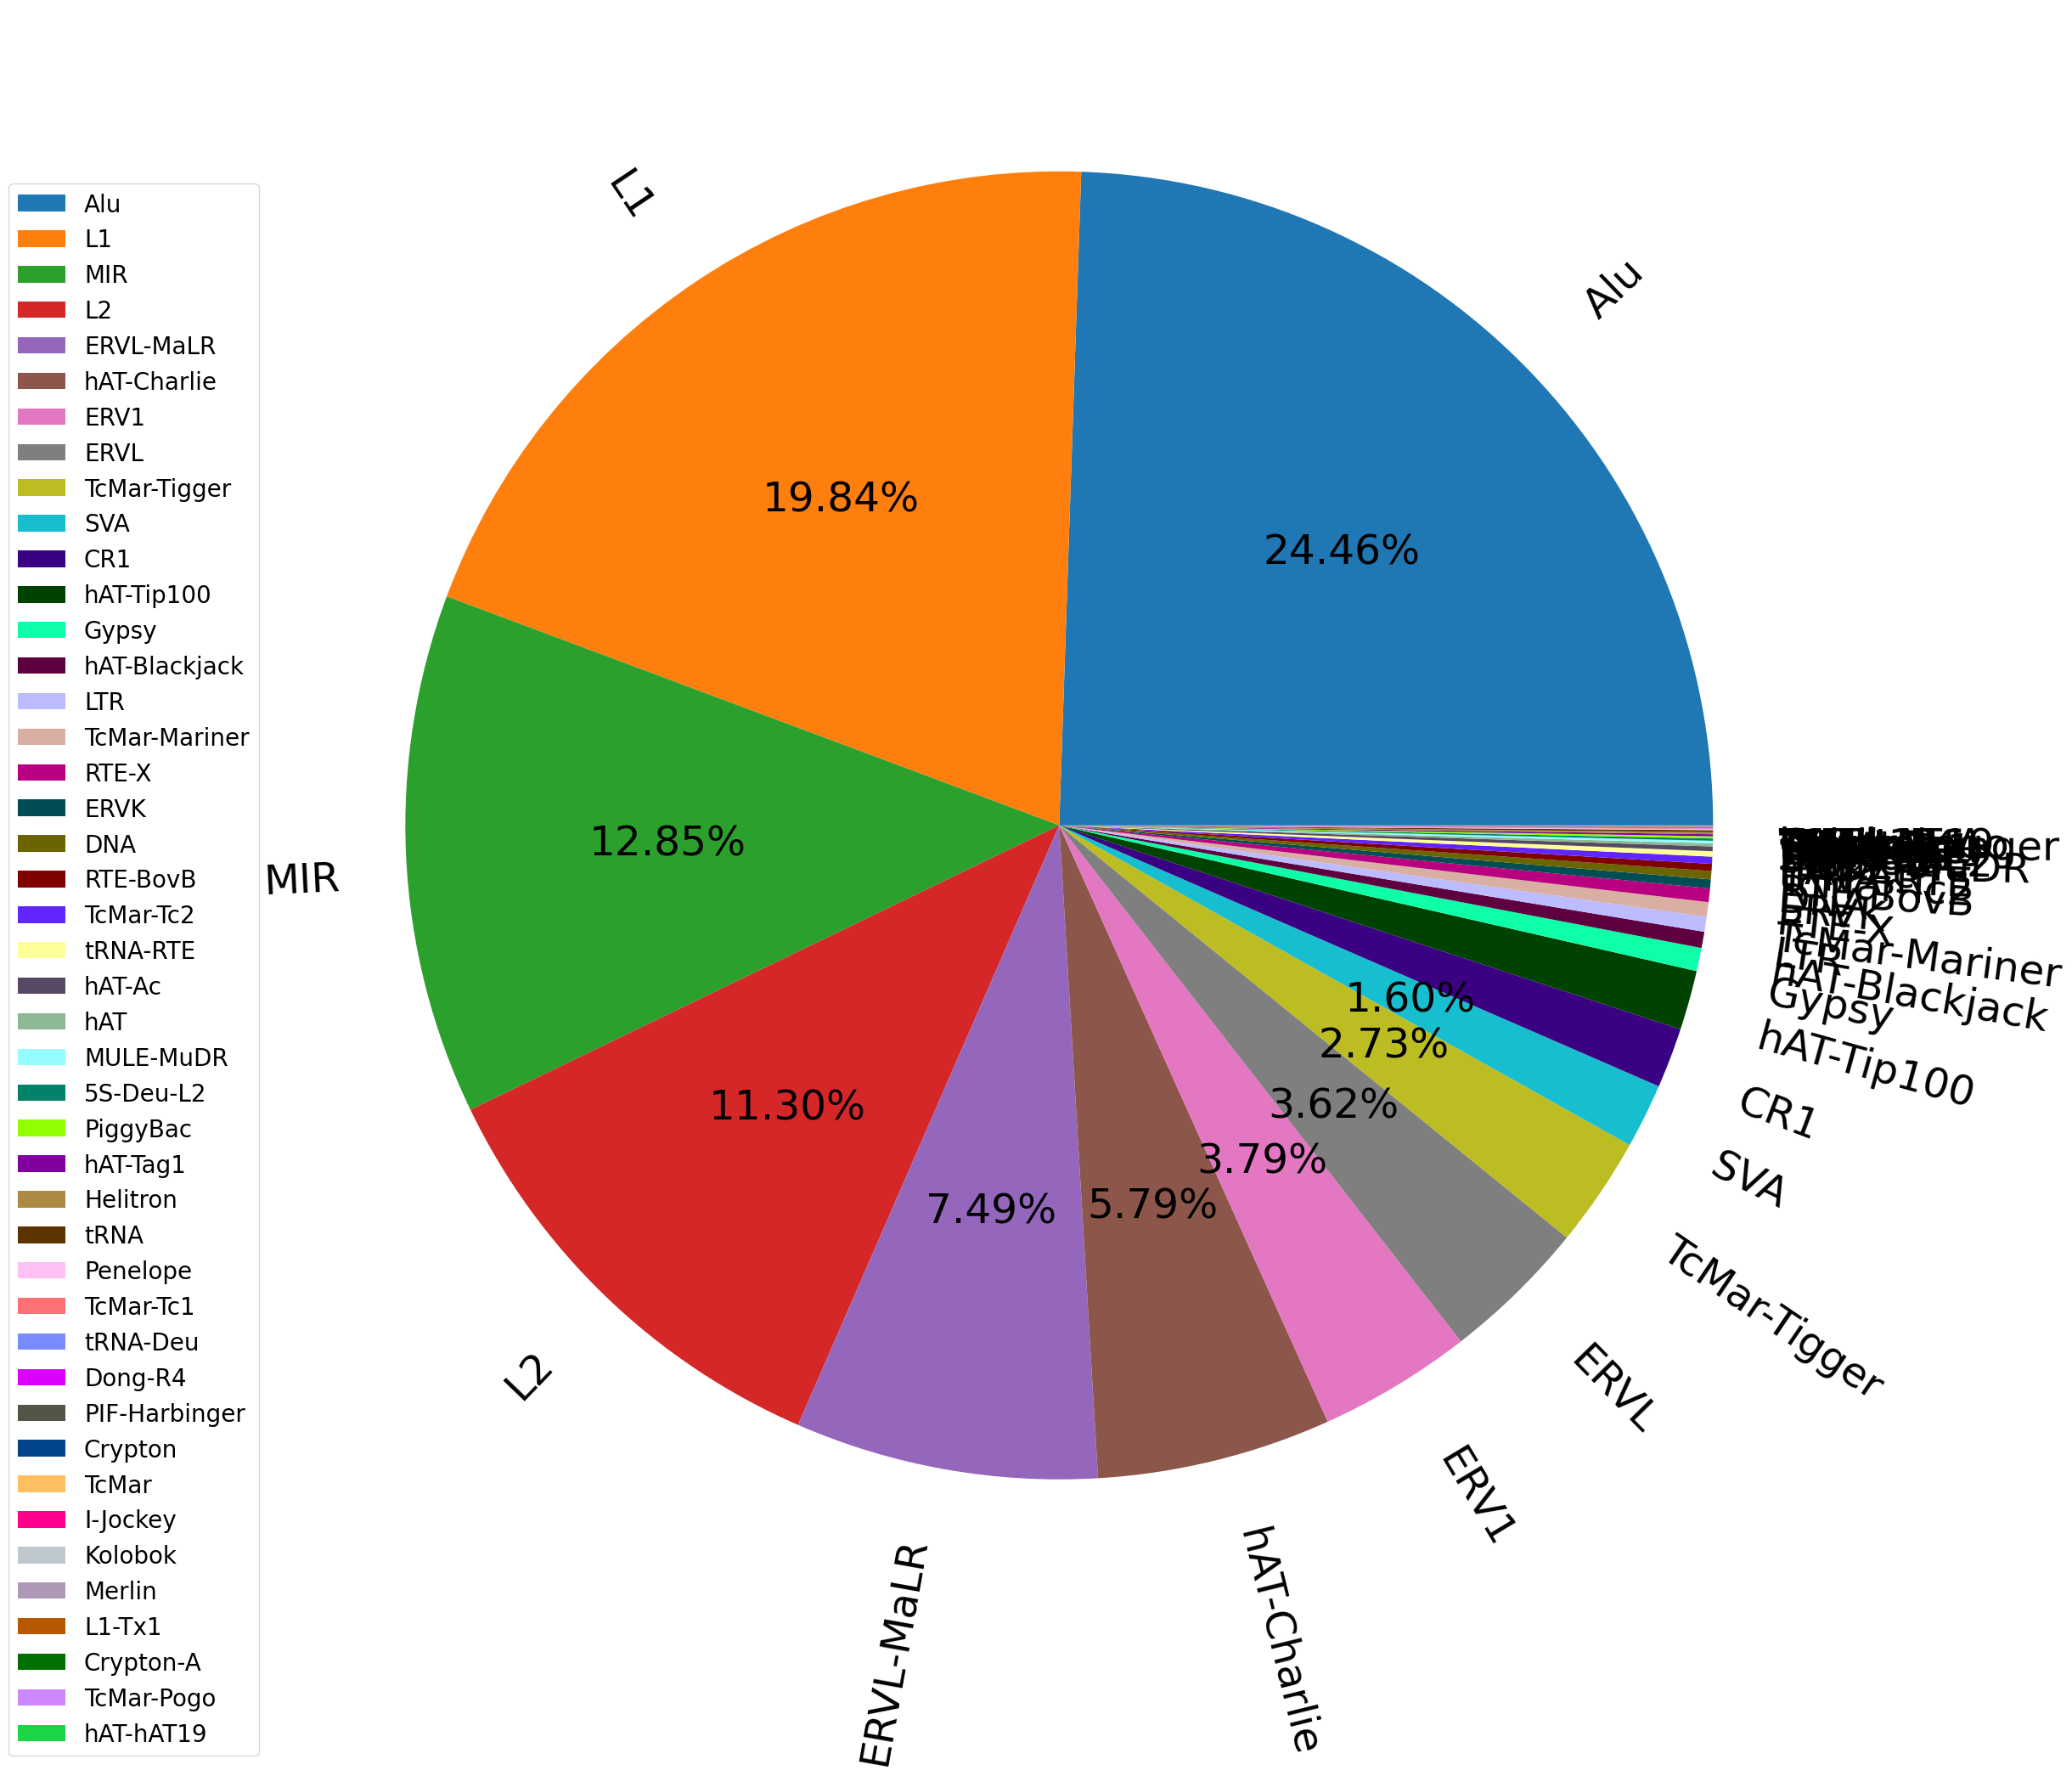

In [15]:
fig1, ax1 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
hg38_pie.plot.pie(y='count',  ax=ax1, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(hg38_pie)])
ax1.legend(loc='upper left', labels=hg38_pie.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax1.set(ylabel=None)

In [16]:
fig1.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/hg38_tes_sf.png', format='png',  transparent=True)

In [12]:
# order
hg38_pie_ord = hg38_data.groupby('order', as_index=False).sum()[['order','count']]
hg38_pie_ord = hg38_pie_ord.sort_values(by='count',ascending=False)
hg38_pie_ord.set_index('order', inplace=True)

[Text(0, 0.5, '')]

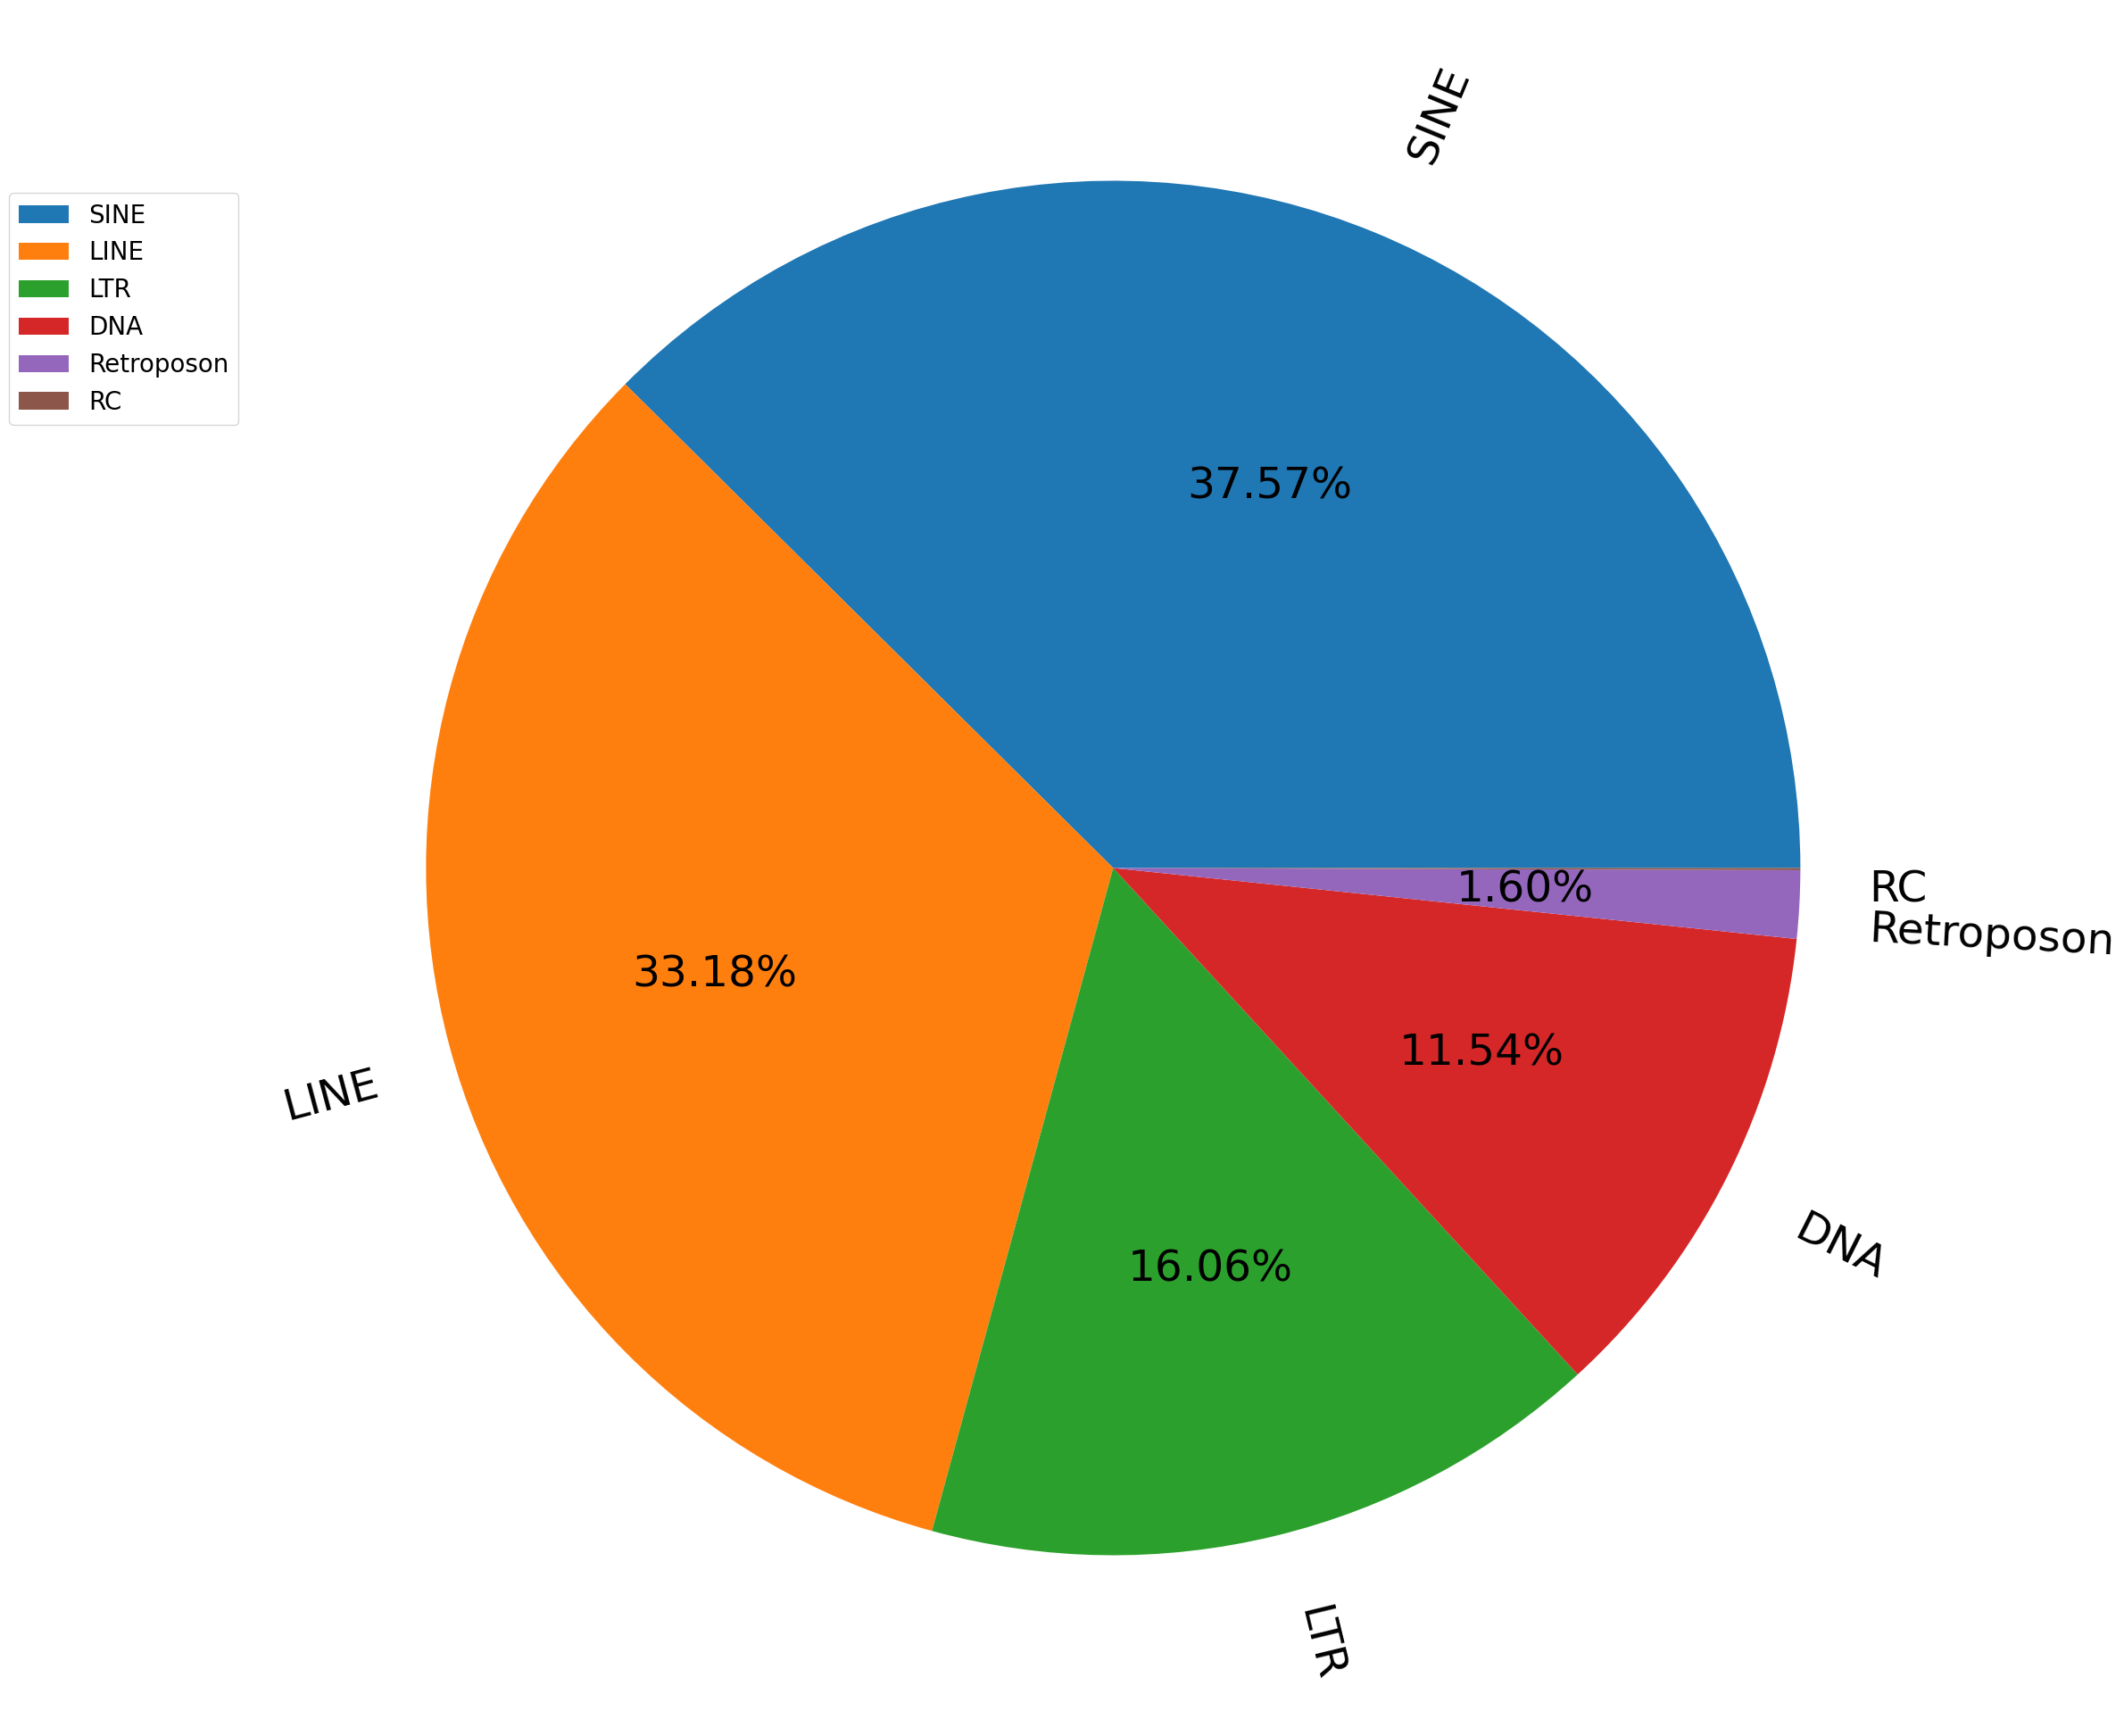

In [38]:
fig2, ax2 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
hg38_pie_ord.plot.pie(y='count',  ax=ax2, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(hg38_pie_ord)])
ax2.legend(loc='upper left', labels=hg38_pie_ord.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax2.set(ylabel=None)

In [39]:
fig2.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/hg38_tes_ord.png', format='png',  transparent=True)

## panpan

In [13]:
# superfamily
panpan_pie = panpan_data[['superfamily','count']]
panpan_pie = panpan_pie.sort_values(by='count',ascending=False)
panpan_pie.set_index('superfamily', inplace=True)

[Text(0, 0.5, '')]

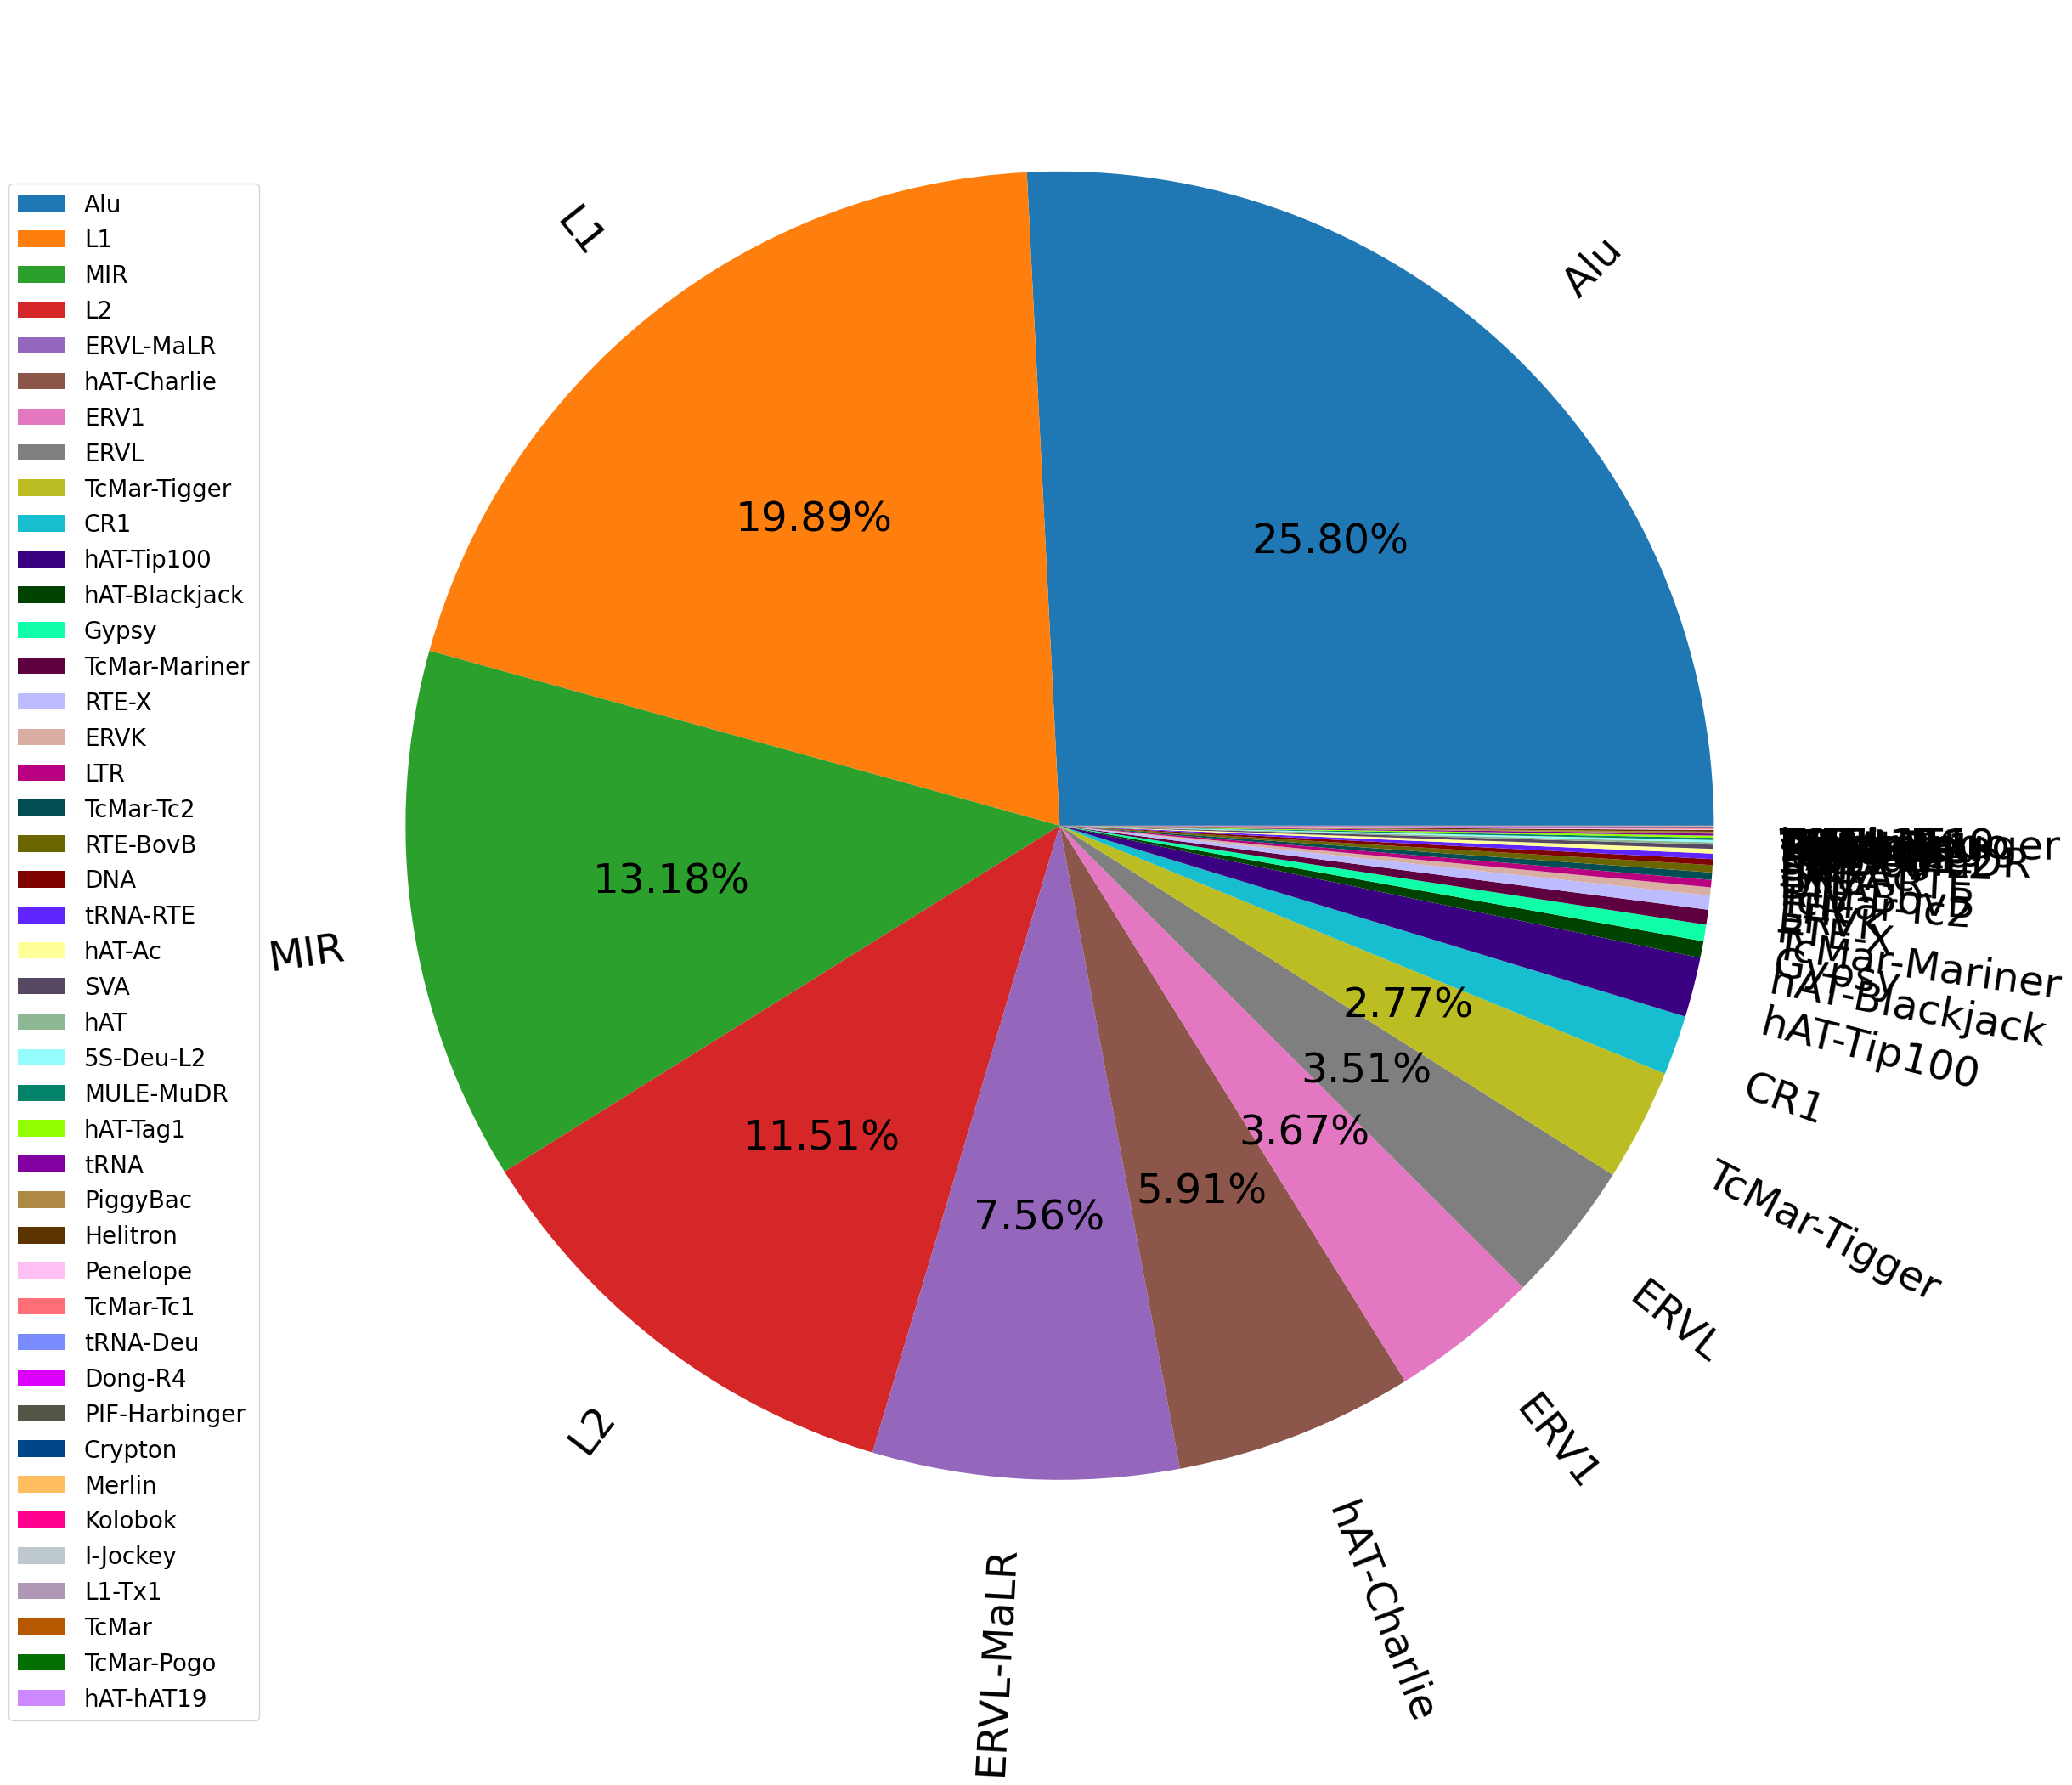

In [41]:
fig1, ax1 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
panpan_pie.plot.pie(y='count',  ax=ax1, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(panpan_pie)])
ax1.legend(loc='upper left', labels=panpan_pie.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax1.set(ylabel=None)

In [42]:
fig1.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/panpan_tes_sf.png', format='png',  transparent=True)

In [14]:
# order
panpan_pie_ord = panpan_data.groupby('order', as_index=False).sum()[['order','count']]
panpan_pie_ord = panpan_pie_ord.sort_values(by='count',ascending=False)
panpan_pie_ord.set_index('order', inplace=True)

[Text(0, 0.5, '')]

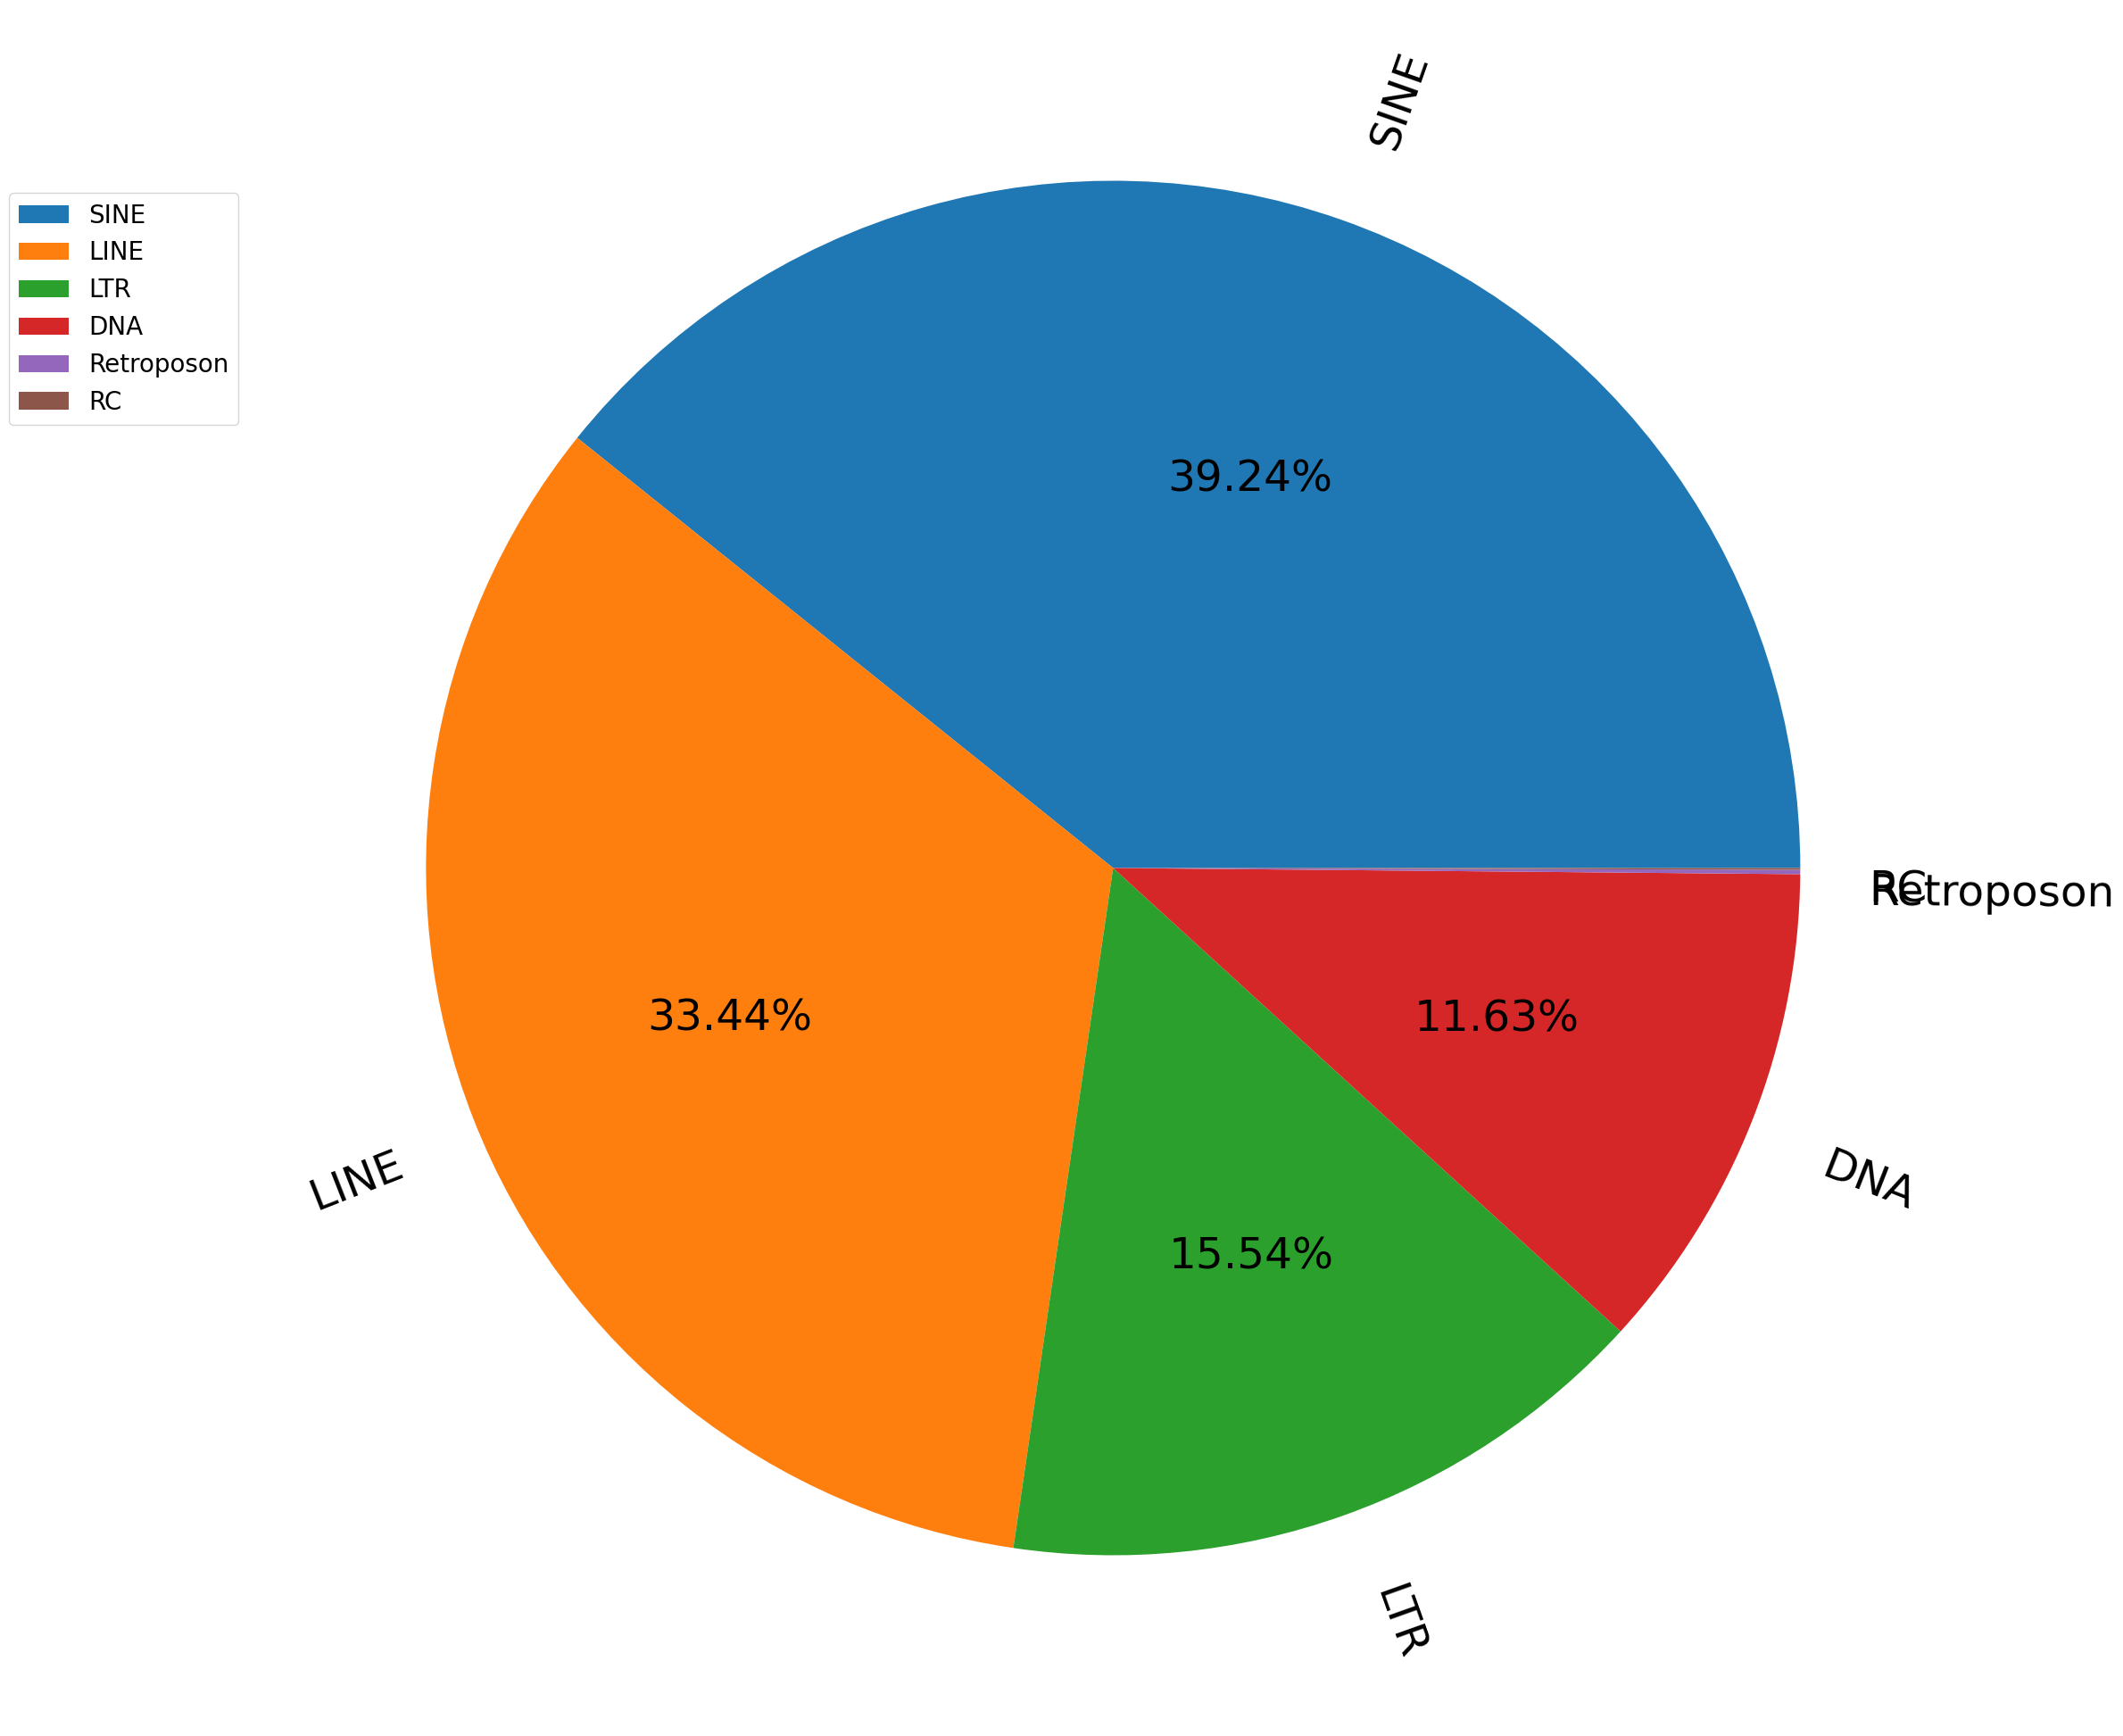

In [44]:
fig2, ax2 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
panpan_pie_ord.plot.pie(y='count',  ax=ax2, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(panpan_pie_ord)])
ax2.legend(loc='upper left', labels=panpan_pie_ord.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax2.set(ylabel=None)

In [45]:
fig2.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/panpan_tes_ord.png', format='png',  transparent=True)

## Gorgor

In [15]:
# superfamily
gorgor_pie = gorgor_data[['superfamily','count']]
gorgor_pie = gorgor_pie.sort_values(by='count',ascending=False)
gorgor_pie.set_index('superfamily', inplace=True)

[Text(0, 0.5, '')]

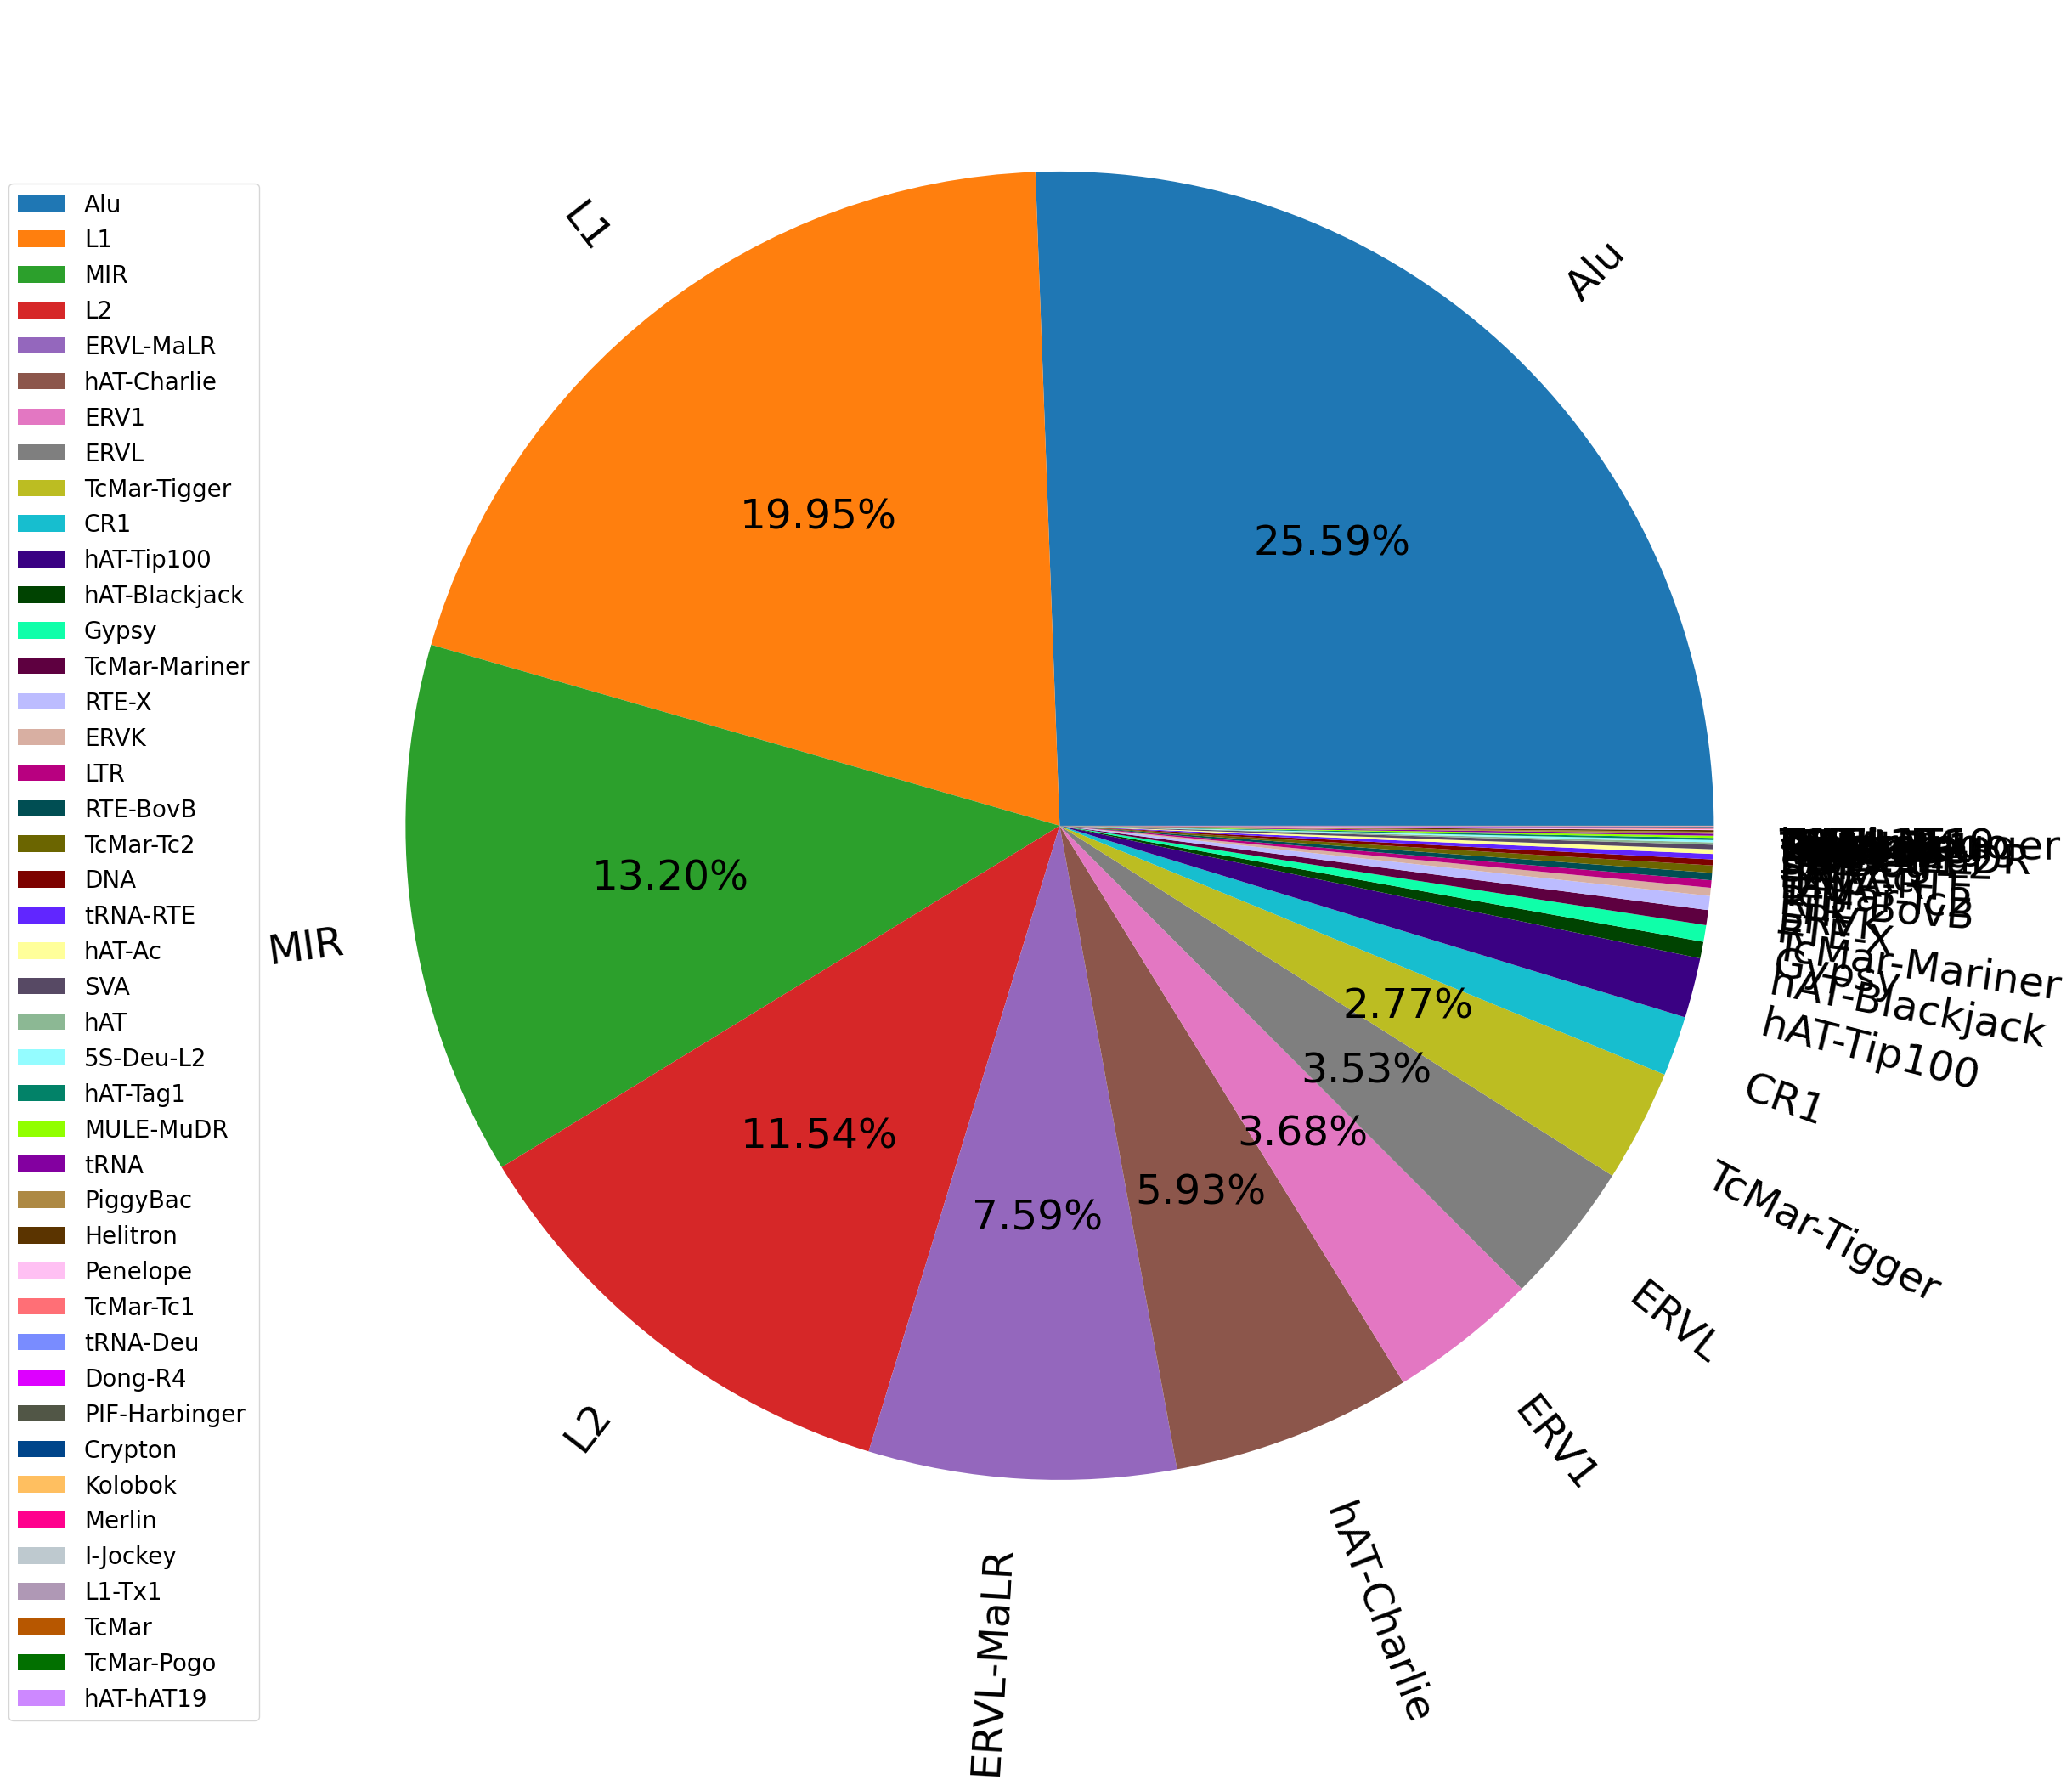

In [48]:
fig1, ax1 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
gorgor_pie.plot.pie(y='count',  ax=ax1, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(gorgor_pie)])
ax1.legend(loc='upper left', labels=gorgor_pie.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax1.set(ylabel=None)

In [49]:
fig1.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/gorgor_tes_sf.png', format='png',  transparent=True)

In [16]:
# order
gorgor_pie_ord = gorgor_data.groupby('order', as_index=False).sum()[['order','count']]
gorgor_pie_ord = gorgor_pie_ord.sort_values(by='count',ascending=False)
gorgor_pie_ord.set_index('order', inplace=True)

[Text(0, 0.5, '')]

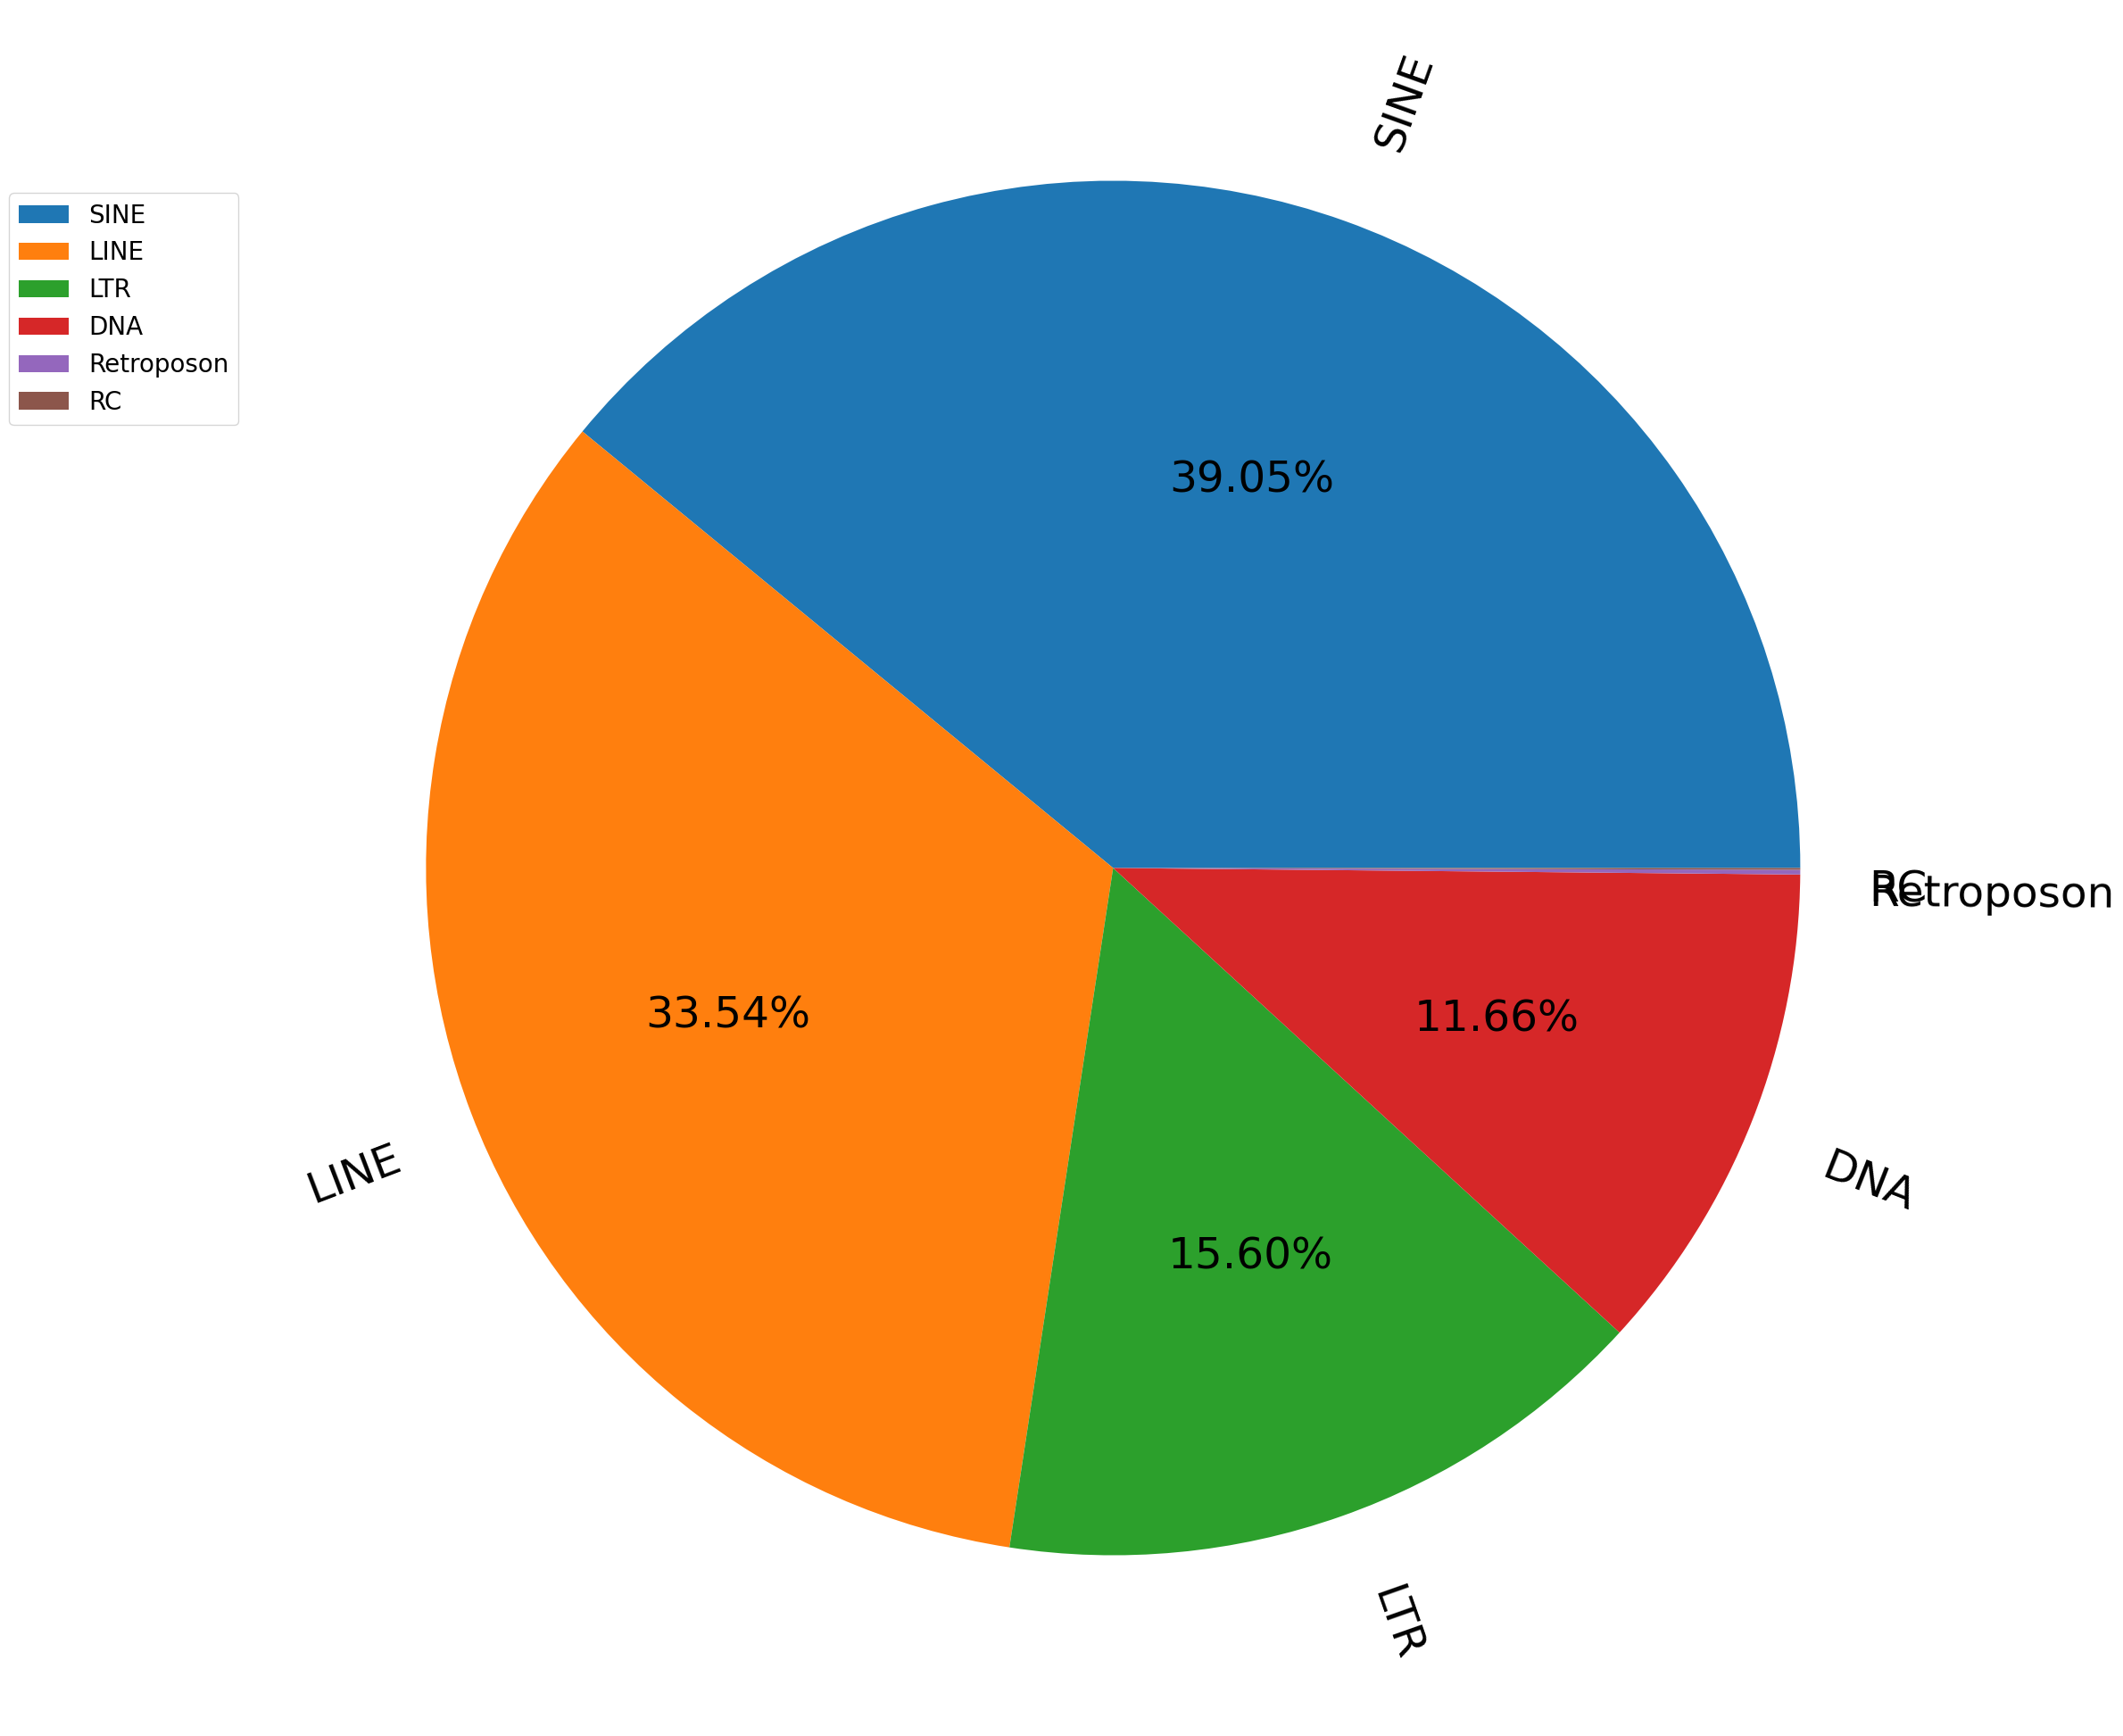

In [51]:
fig2, ax2 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
gorgor_pie_ord.plot.pie(y='count',  ax=ax2, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(gorgor_pie_ord)])
ax2.legend(loc='upper left', labels=gorgor_pie_ord.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax2.set(ylabel=None)

In [52]:
fig2.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/gorgor_tes_ord.png', format='png',  transparent=True)

## mmul

In [17]:
# superfamily
mmul_pie = mmul_data[['superfamily','count']]
mmul_pie = mmul_pie.sort_values(by='count',ascending=False)
mmul_pie.set_index('superfamily', inplace=True)

[Text(0, 0.5, '')]

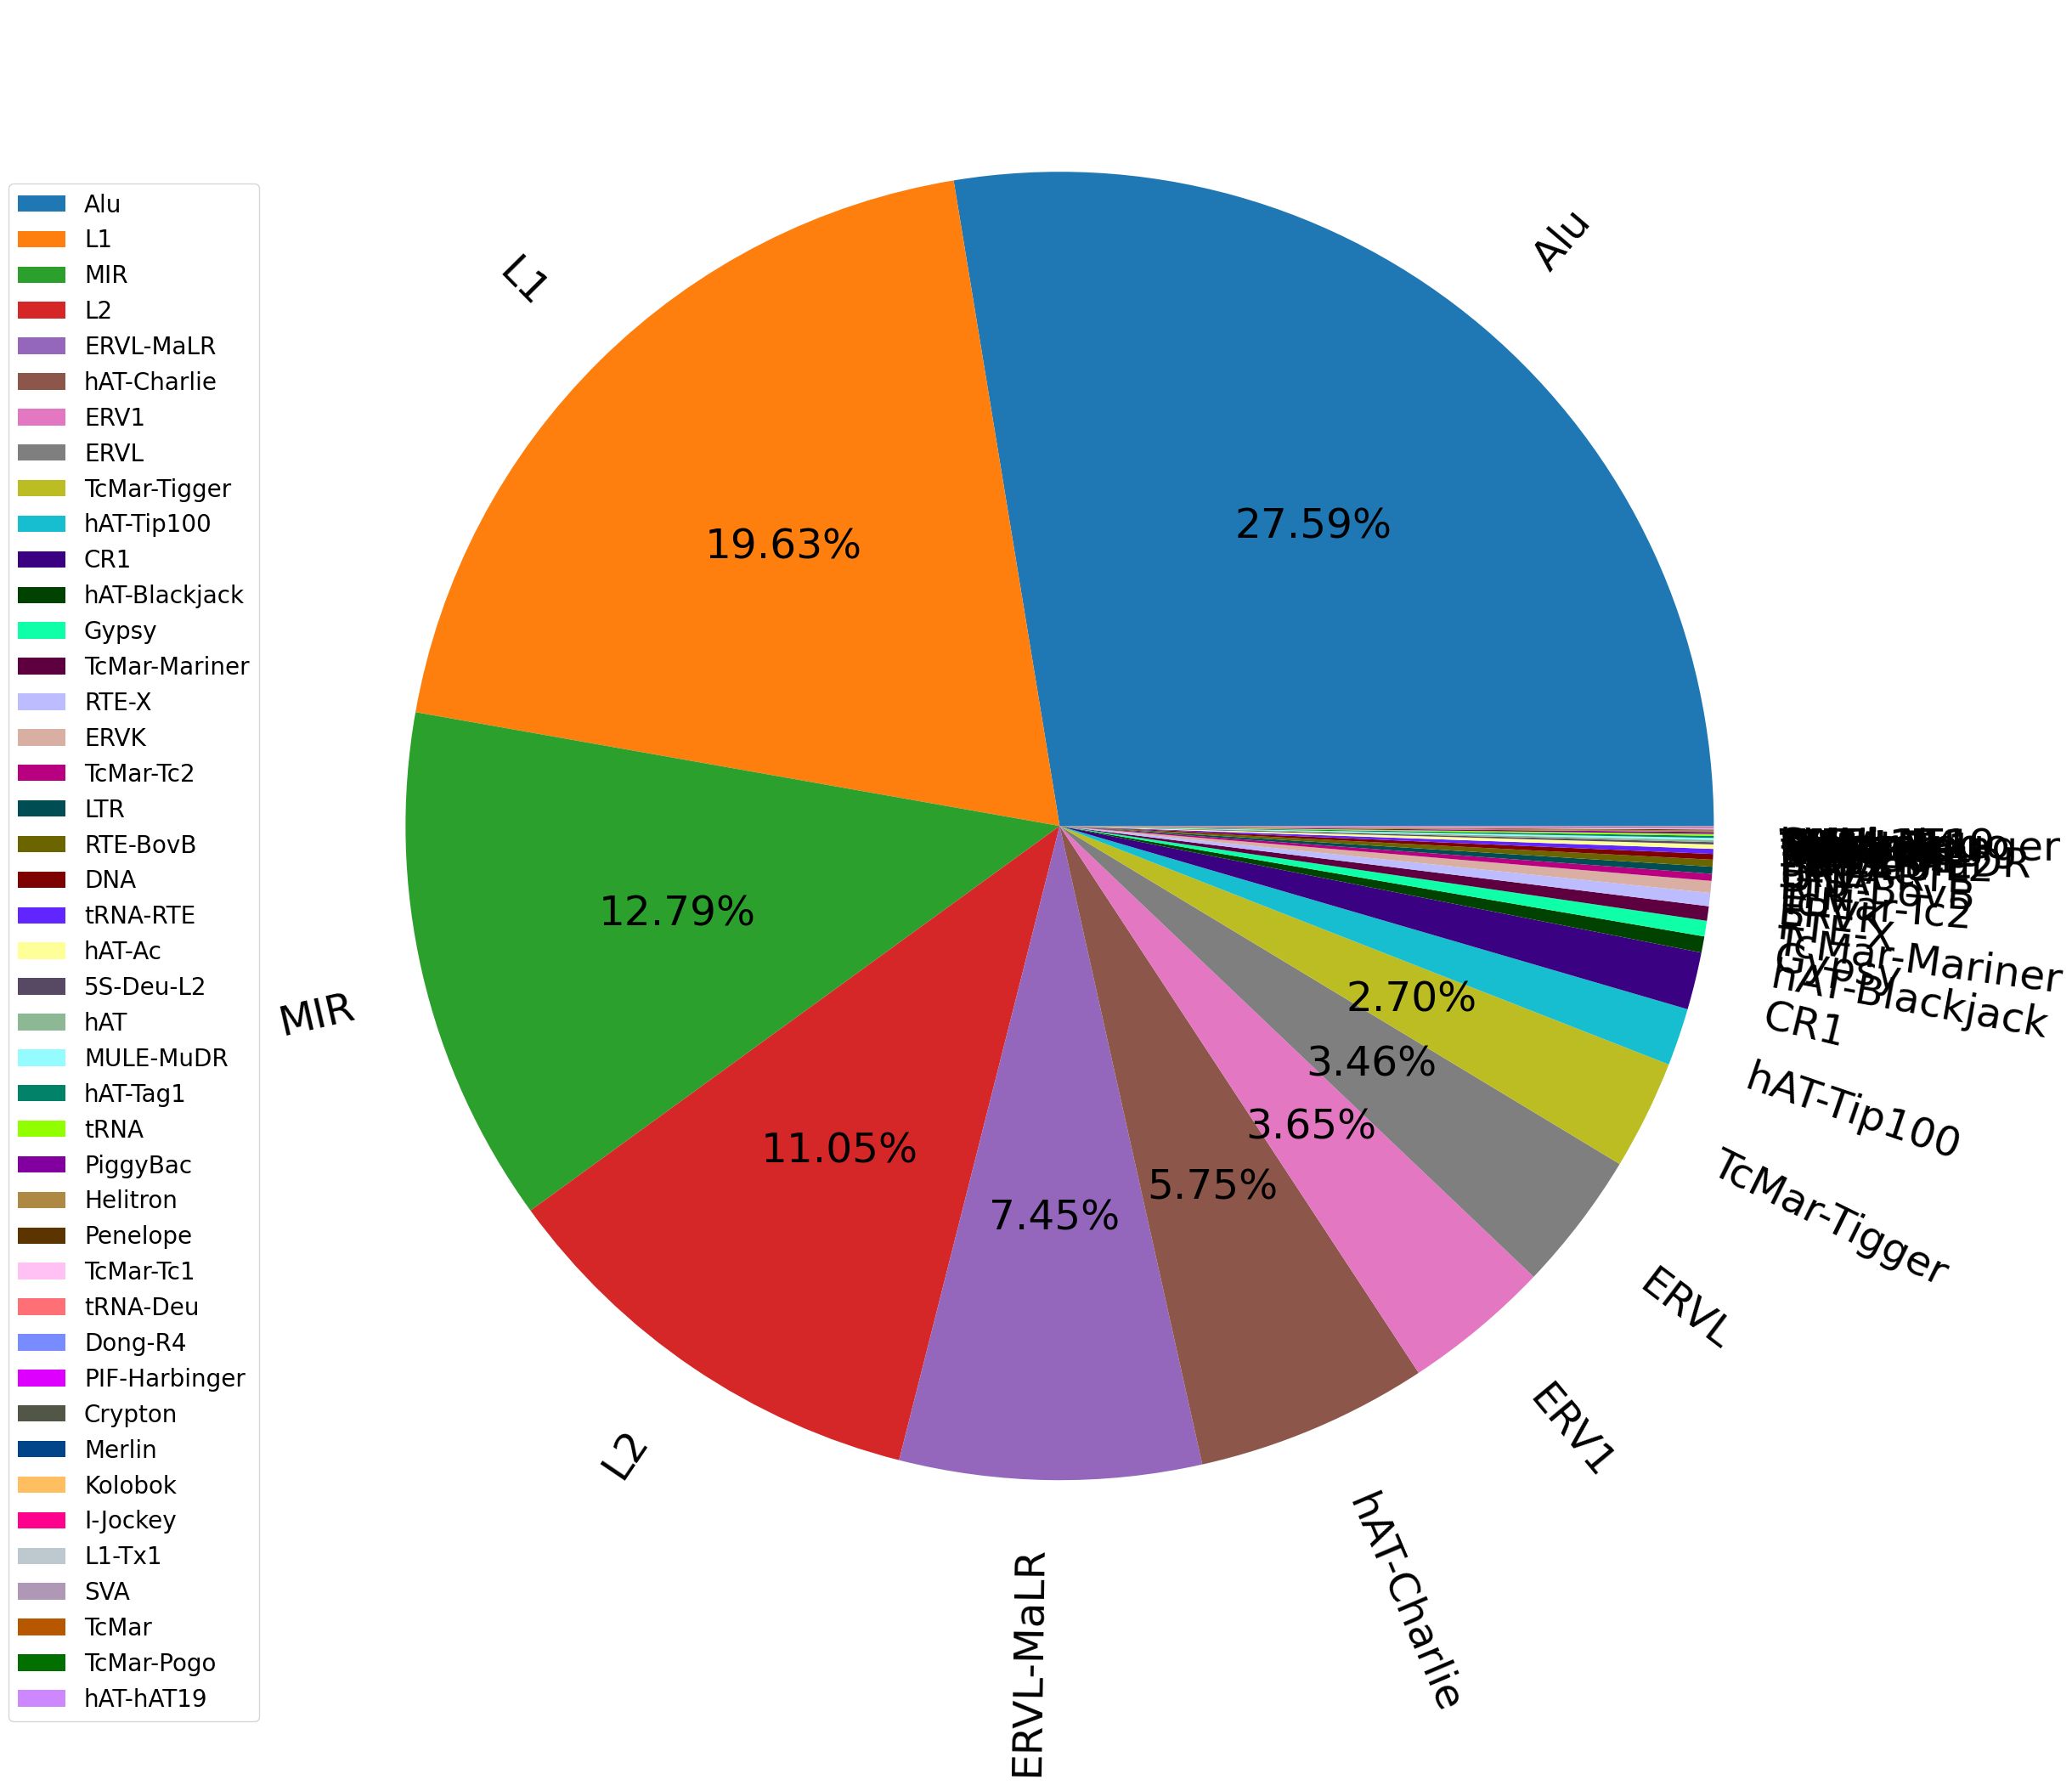

In [54]:
fig1, ax1 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
mmul_pie.plot.pie(y='count',  ax=ax1, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(mmul_pie)])
ax1.legend(loc='upper left', labels=mmul_pie.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax1.set(ylabel=None)

In [55]:
fig1.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/mmul_tes_sf.png', format='png',  transparent=True)

In [18]:
# order
mmul_pie_ord = mmul_data.groupby('order', as_index=False).sum()[['order','count']]
mmul_pie_ord = mmul_pie_ord.sort_values(by='count',ascending=False)
mmul_pie_ord.set_index('order', inplace=True)

[Text(0, 0.5, '')]

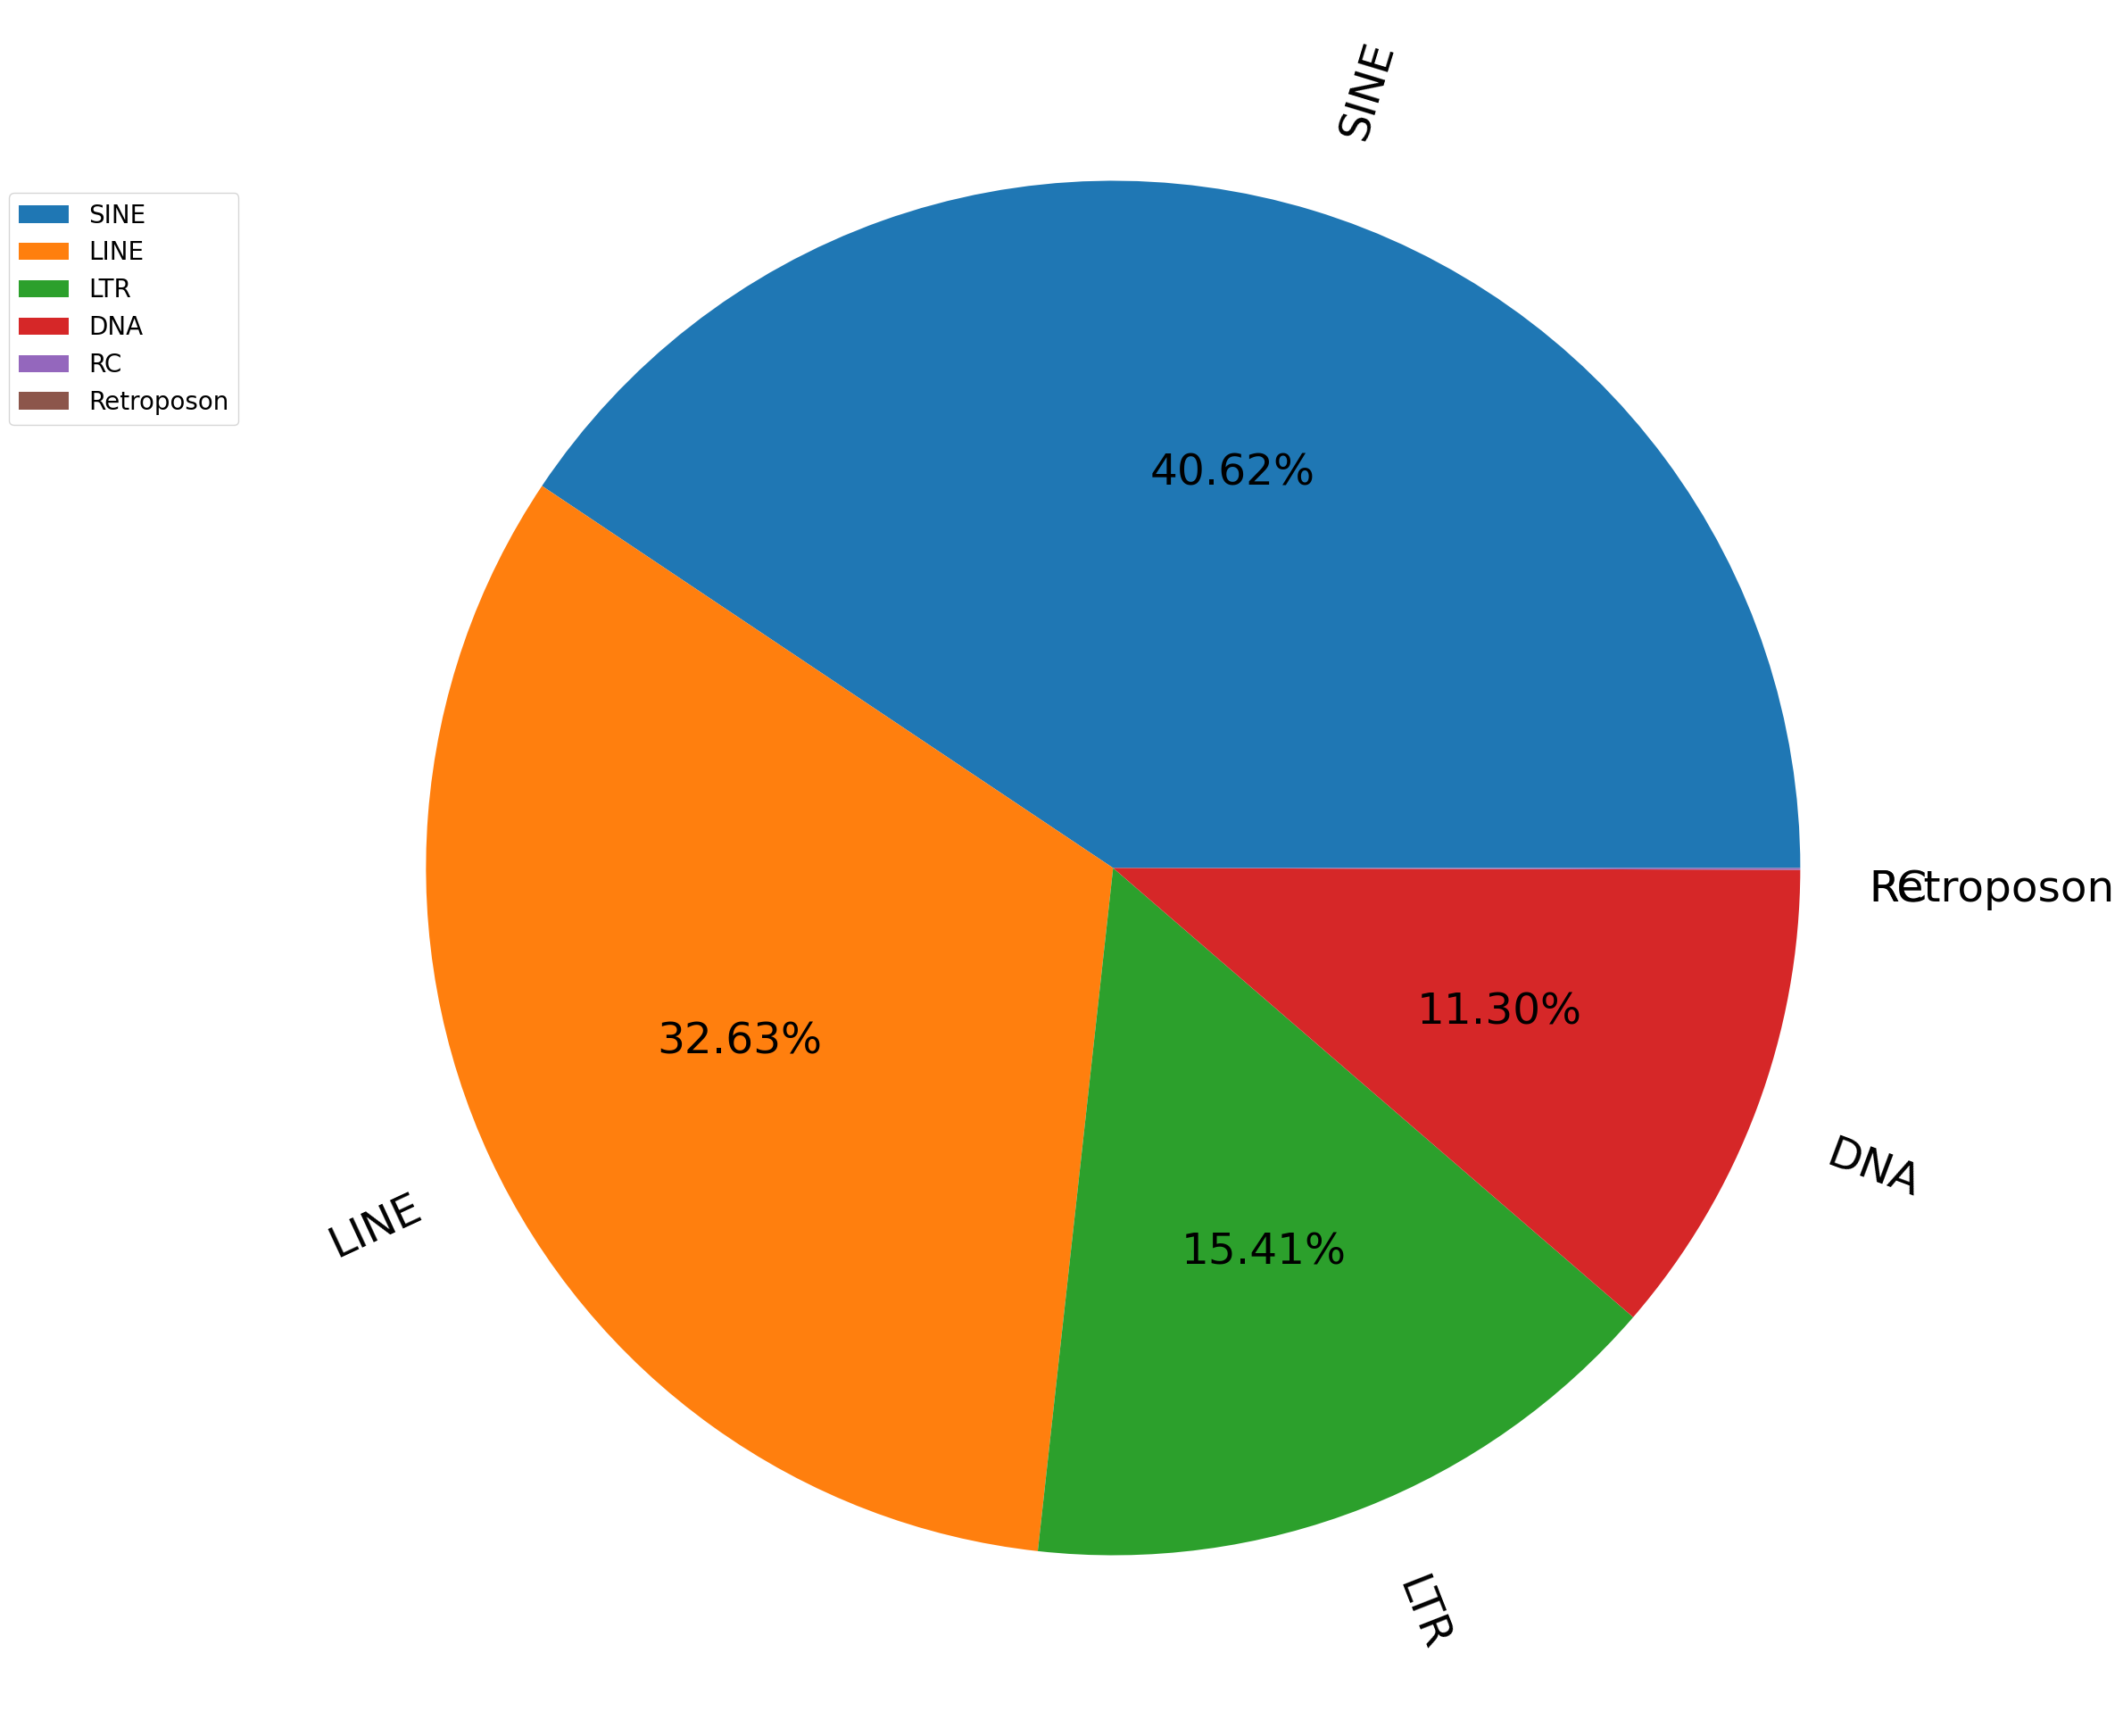

In [64]:
fig2, ax2 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
mmul_pie_ord.plot.pie(y='count',  ax=ax2, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(mmul_pie_ord)])
ax2.legend(loc='upper left', labels=mmul_pie_ord.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax2.set(ylabel=None)

In [65]:
fig2.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/mmul_tes_ord.png', format='png',  transparent=True)

## caljac

In [19]:
# superfamily
caljac_pie = caljac_data[['superfamily','count']]
caljac_pie = caljac_pie.sort_values(by='count',ascending=False)
caljac_pie.set_index('superfamily', inplace=True)

[Text(0, 0.5, '')]

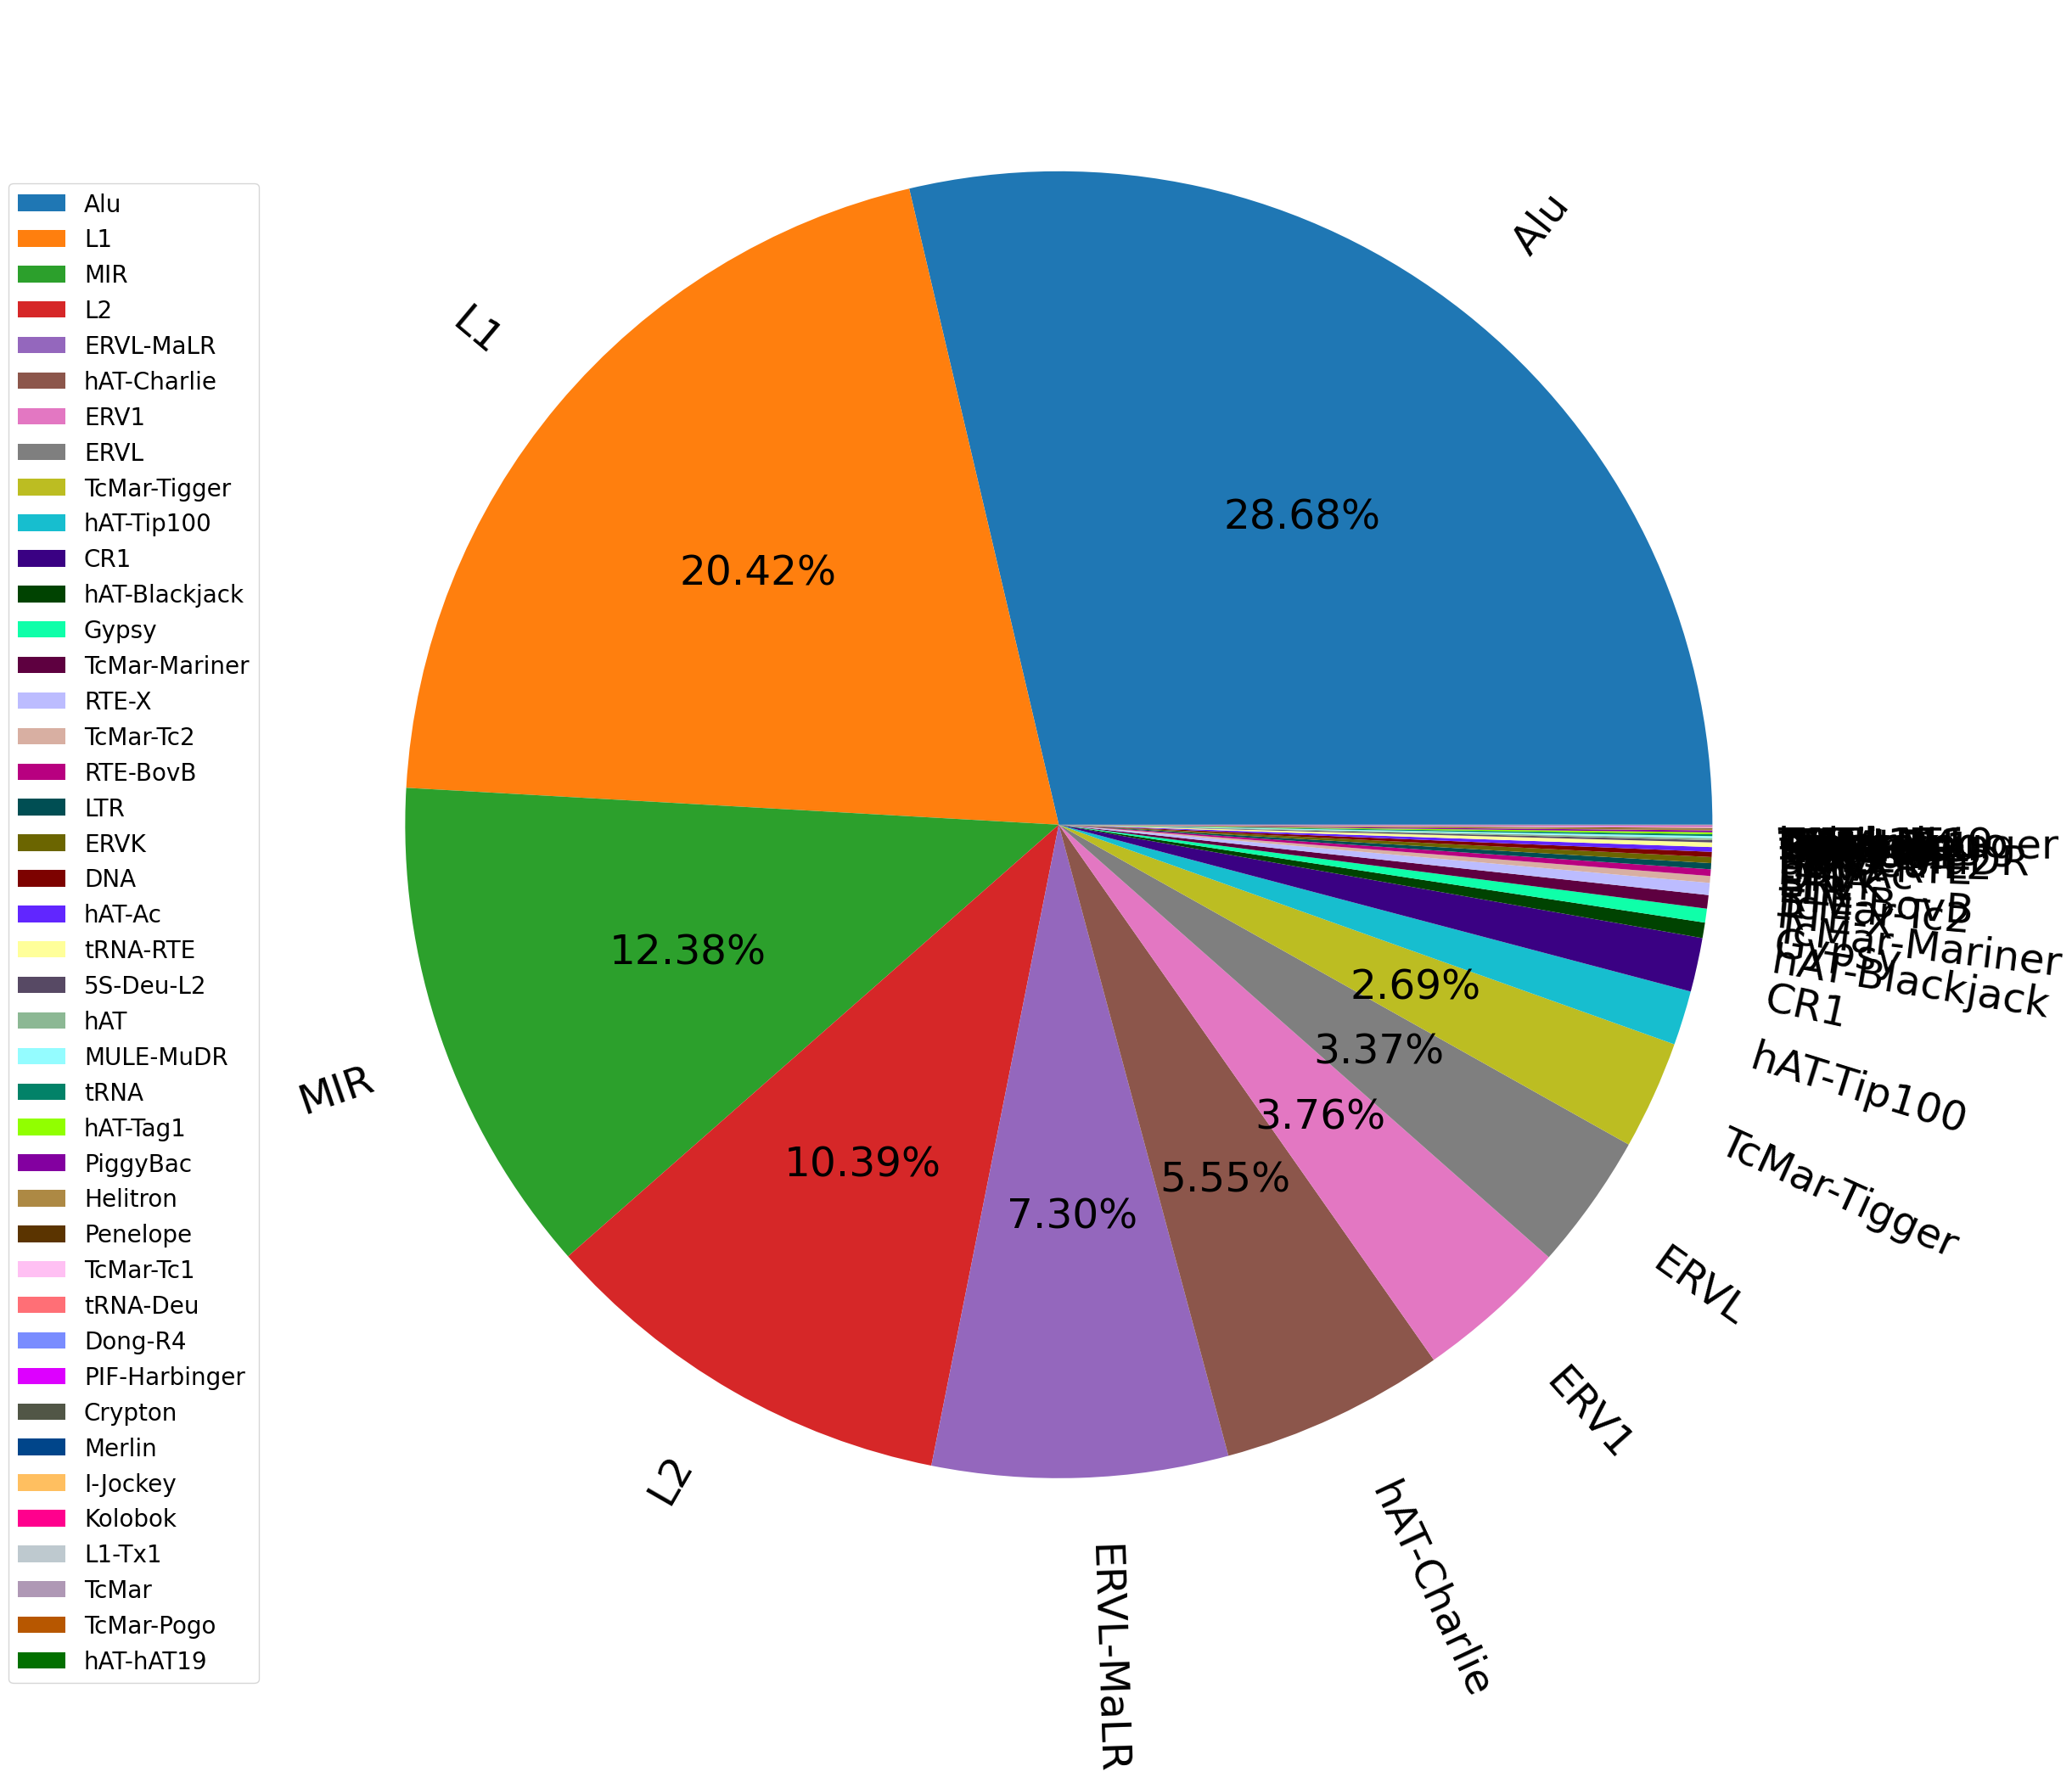

In [67]:
fig1, ax1 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
caljac_pie.plot.pie(y='count',  ax=ax1, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(caljac_pie)])
ax1.legend(loc='upper left', labels=caljac_pie.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax1.set(ylabel=None)

In [68]:
fig1.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/caljac_tes_sf.png', format='png',  transparent=True)

In [20]:
# order
caljac_pie_ord = caljac_data.groupby('order', as_index=False).sum()[['order','count']]
caljac_pie_ord = caljac_pie_ord.sort_values(by='count',ascending=False)
caljac_pie_ord.set_index('order', inplace=True)

[Text(0, 0.5, '')]

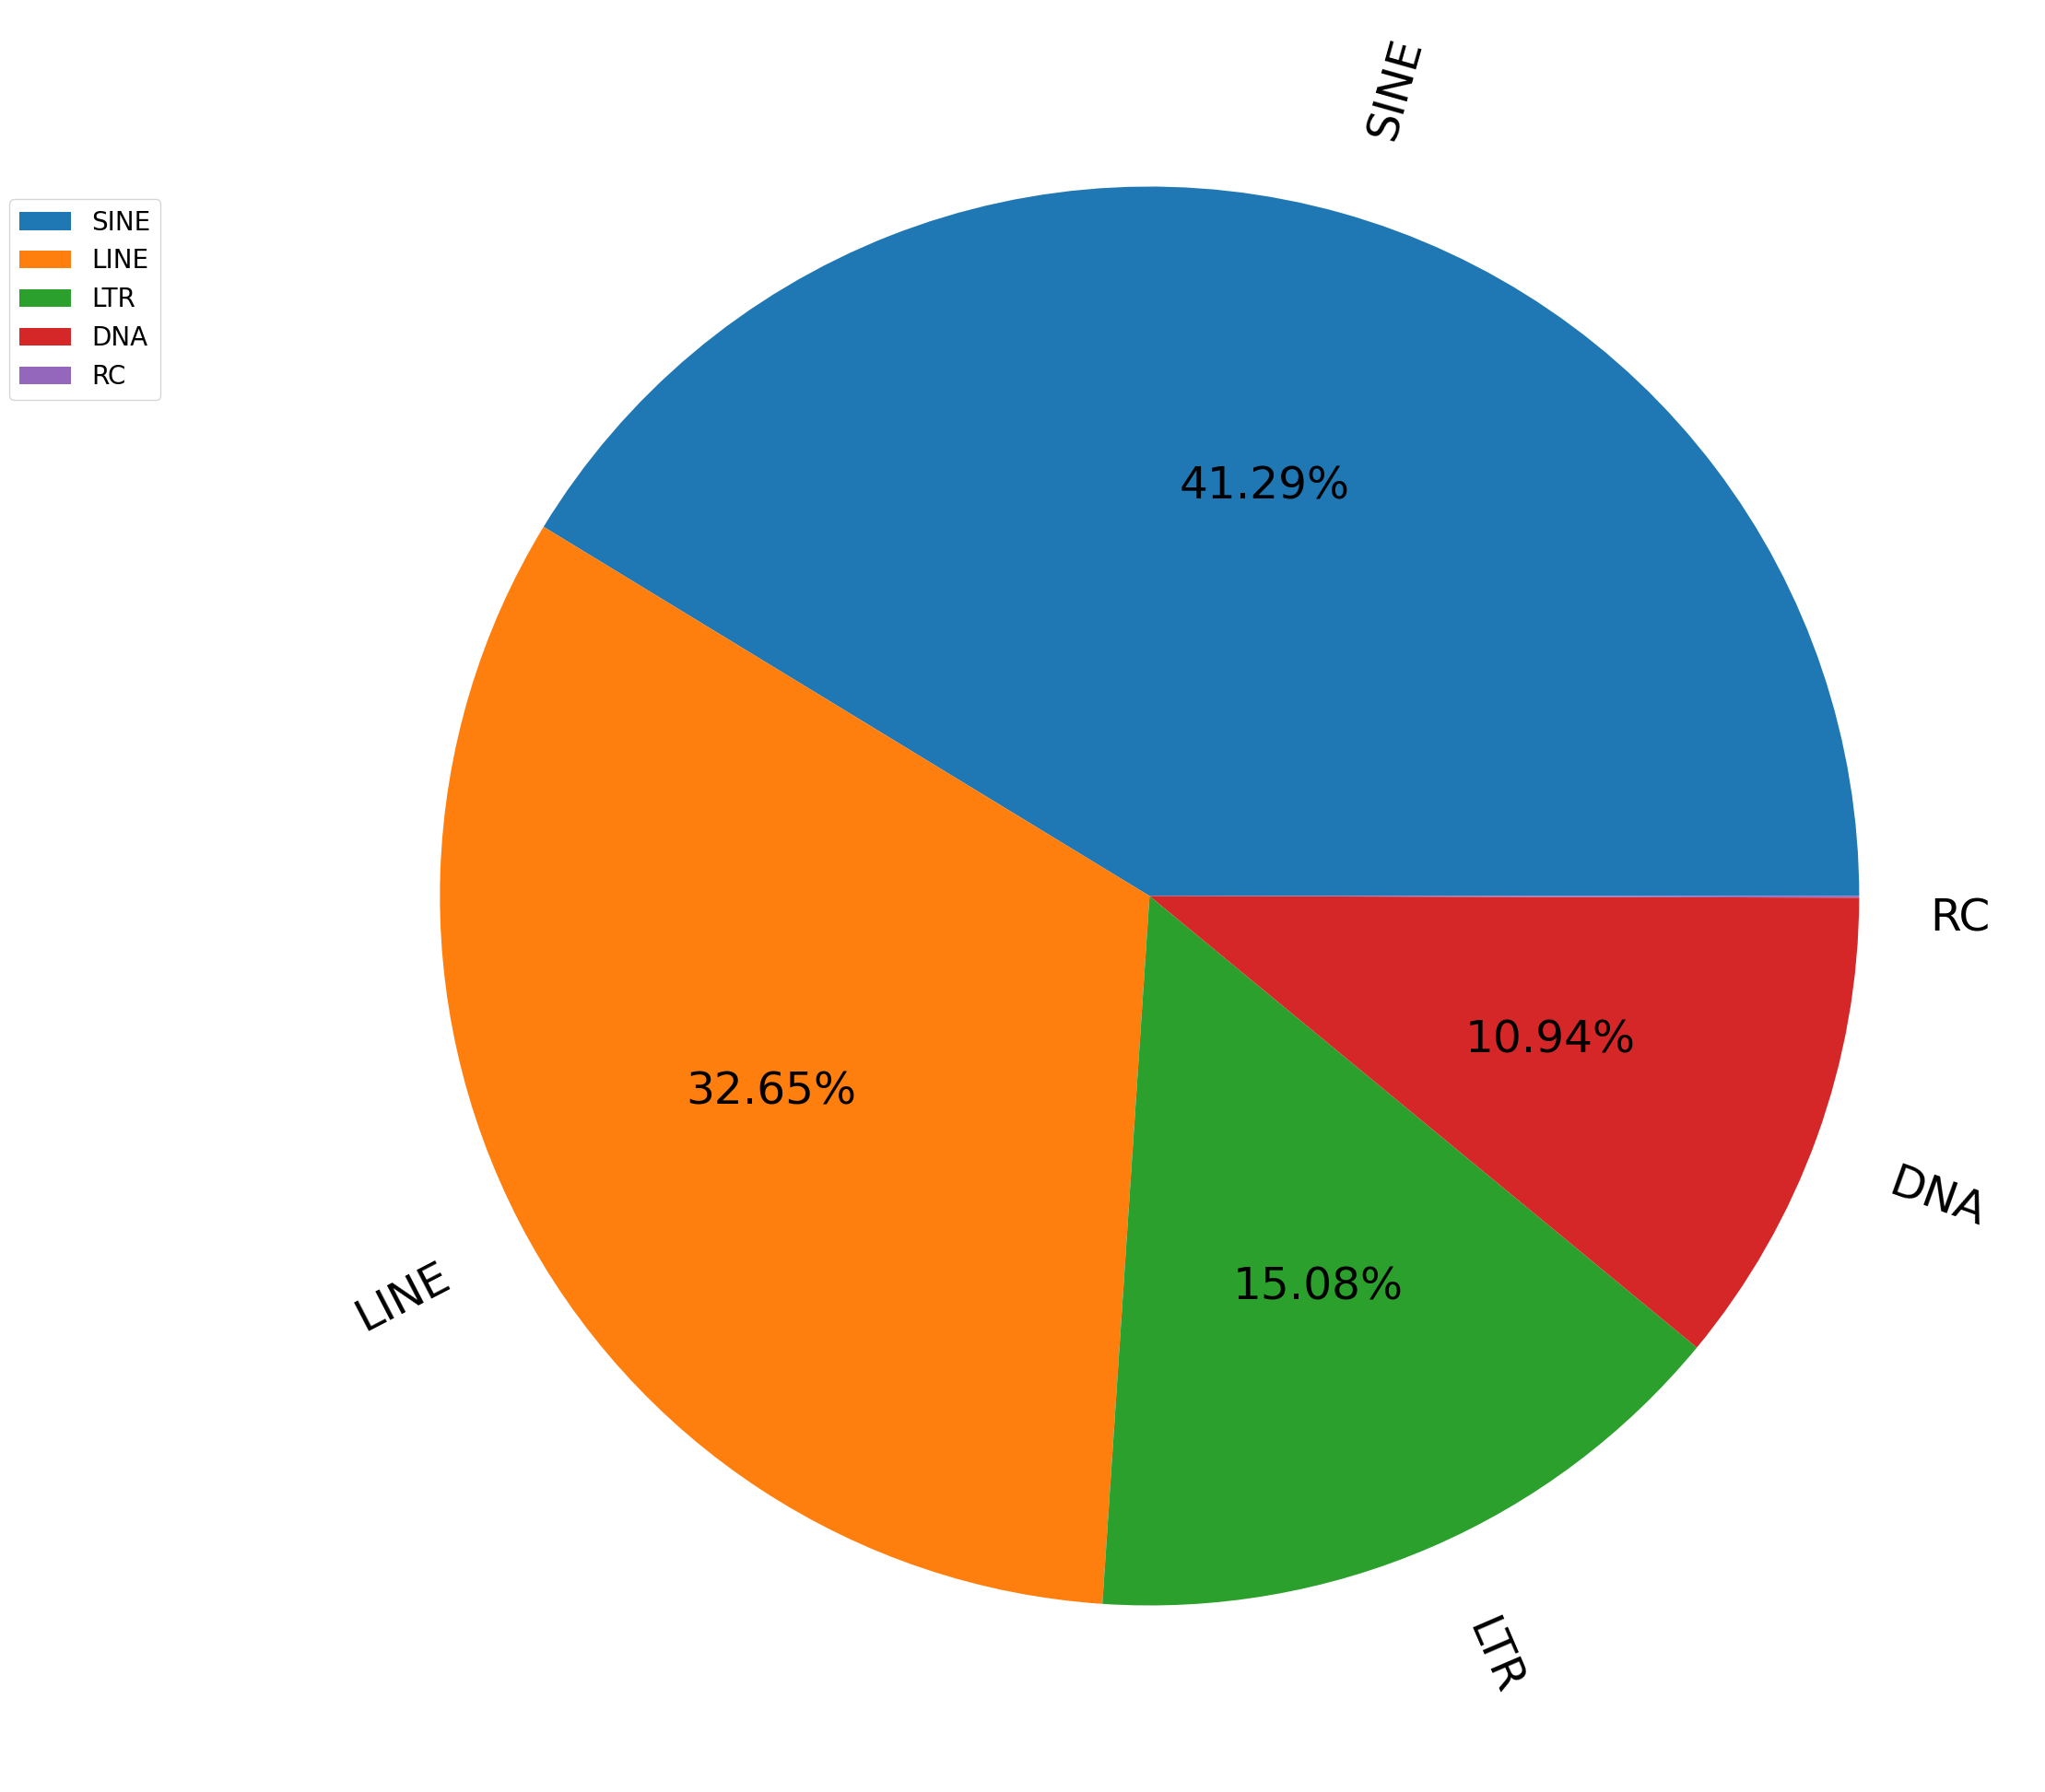

In [61]:
fig2, ax2 = plt.subplots(figsize=(25,25))  # Create a figure containing a single axes.
caljac_pie_ord.plot.pie(y='count',  ax=ax2, fontsize=35,autopct=my_autopct,rotatelabels=True,colors=cc.glasbey_category10[:len(caljac_pie_ord)])
ax2.legend(loc='upper left', labels=caljac_pie_ord.index.to_list(), bbox_to_anchor=(-0.15,0.9))
ax2.set(ylabel=None)

In [62]:
fig2.savefig('/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/caljac_tes_ord.png', format='png',  transparent=True)

## ALL

In [70]:
merged_df = pd.concat([hg38_pie, panpan_pie, gorgor_pie, mmul_pie, caljac_pie], axis=1,)
merged_df_ord = pd.concat([hg38_pie_ord, panpan_pie_ord, gorgor_pie_ord, mmul_pie_ord, caljac_pie_ord], axis=1,)

In [71]:
merged_df.columns = ['Human','Bonobo','Gorilla','Macaca','Marmoset']
merged_df_ord.columns = ['Human','Bonobo','Gorilla','Macaca','Marmoset']

In [79]:
sf_dist = merged_df.T.hvplot.bar(stacked=True,height=1500,width=800,yformatter=NumeralTickFormatter(format='0.0a'), rot=45, title = 'Distribution of TEs superfamilies in 5 primates.', 
                                 fontsize={'title': '15pt','xticks': 20,'yticks':12,})

In [73]:
sf_dist_ord = merged_df_ord.T.hvplot.bar(stacked=True,height=1500,width=800,yformatter=NumeralTickFormatter(format='0.0a'), rot=45, title = 'Distribution of TEs Order in 5 primates.', fontsize={'title': '15pt','xticks': 20,'yticks':12})

In [74]:
hvplot.save(sf_dist, '/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/sf_dist.html')
hvplot.save(sf_dist_ord, '/mnt/d/GoogleDrive/Doctorado/tesis/final_v1/img/tes/sf_dist_ord.html')        